# Jacobi Elliptic Functions as Kronecker Theta Functions

In [119]:
from sympy import *
(x, y, X, Y, Z, B, C, n, m, l, j, q, N, M, K, k, z, s, g2, g3, rho, tau,
 z0, w, e1, e2, e3, Delta, 
 omega1, omega2, omega3, eta1, eta2, eta3, r) = symbols(
    '''x, y, X, Y, Z, B, C, n, m, l, j, q, N, M, K, k, z, s, g2, g3, rho, tau,
    z0, w, e1, e2, e3, Delta, 
    omega1, omega2, omega3, eta1, eta2, eta3, r'''
)
alpha, delta, t, nu = symbols('alpha, delta, t, nu')
pw = Function('pw') # Weierstrass P function
pwp = Function('pwp') # Derivative of Weierstrass P function
zw = Function('zw') # Weierstrass Zeta function
sigma = Function('sigma') # Weierstrass Sigma function
theta = Function('theta') # Jacobi theta function
sn = Function('sn') # Jacobi elliptic sn
cn =  Function('cn') # Jacobi elliptic cn
dn = Function('dn') # Jacobi elliptic dn

rho = Function('rho')
f = Function('f')
h = Function('h')
s = Function('s')
u = Function('u')
v = Function('v')
P = Function('P') # Polynomial
Q = Function('Q') # Polynomial
R = Function('R') # Polynomial

phi = Function('phi')
Phi = Function('Phi')
phi1 = Function('phi1')
phi2 = Function('phi2')
phi3 = Function('phi3')
A = IndexedBase('A')
Det = Function("Det")

vartheta = IndexedBase('vartheta')
kappa = IndexedBase('kappa')
beta = IndexedBase('beta')
eta = IndexedBase('eta')
p = IndexedBase('p')
mu = IndexedBase('mu')
xi = IndexedBase('xi')
omega = IndexedBase('omega')
a = IndexedBase('a')
b = IndexedBase('b')
c = IndexedBase('c')
d = IndexedBase('d')
p = IndexedBase('p')
G = IndexedBase('G')
psi = IndexedBase('psi')
upsilon = IndexedBase('upsilon')
epsilon = IndexedBase('epsilon')
WPdet = Function('WPdet')
T = Function('T')
U = Function('U')
V = Function('V')
Tc = Function('Tc')
Uc = Function('Uc')
Vc = Function('Vc')
W = Function('W')


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# kth order derivatives of Weierstrass P
from wpk import wpk, run_tests

# The package containing mpmath expressions for Weierstrass elliptic functions
from numerical_evaluation.weierstrass_modified import Weierstrass
we = Weierstrass()
from mpmath import exp as mpexp
# Jacobi elliptic functions in mpmath
# https://omz-software.com/pythonista/sympy/modules/mpmath/functions/elliptic.html
from mpmath import ellipfun, ellipk, mfrom, qfrom, jtheta

# Numeric solutions to diff eqs
from numpy import linspace, absolute, angle, square, real, imag, conj, array as arraynp, concatenate
from numpy import vectorize as np_vectorize # not to get confused with vectorise in other packages
import scipy.integrate
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

def num_evaluate_weierstrass_term(term, subs_values_array):
    
    result = (term
        .subs(subs_values_array)
        .replace(sigma, we.wsigma_from_g2_g3)
        .replace(zw, we.wzeta_from_g2_g3)
        .replace(pw, we.wp_from_g2_g3)
        .replace(pwp, we.wpprime_from_g2_g3)
    )
    try:
        result = result.evalf()
    except:
        pass
    return result


def num_evaluate_weierstrass(expression, subs_values_array, show_expression=True):
    
    lhs_value = num_evaluate_weierstrass_term(expression.lhs, subs_values_array)
    rhs_value = num_evaluate_weierstrass_term(expression.rhs, subs_values_array)
    
    print('LHS', lhs_value)
    print('RHS', rhs_value)
    # Symmetric Mean Absolute Percentage Error (SMAPE)
    print('ERROR (SMAPE)', abs(lhs_value - rhs_value) * 2/(abs(lhs_value) + abs(rhs_value)))
    
    if show_expression:
        return expression

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Weierstrass elliptic function identities

In [2]:
pwp_sqrd = Eq(pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3)

pw_xy_addition = Eq(pw(x+y,g2,g3), 
   ((pwp(x, g2, g3) - pwp(y, g2, g3))**2/(pw(x, g2, g3) - pw(y, g2, g3))**2)/4 - pw(x, g2, g3) - pw(y, g2, g3)
)

# pwp_xy_addition = Eq(pw_xy_addition.lhs.diff(x) + pw_xy_addition.lhs.diff(y),
#    pw_xy_addition.rhs.diff(x) + pw_xy_addition.rhs.diff(y)).subs([
#     (diff(pw(x+y,g2,g3),x),pwp(x+y,g2,g3)),
#     (diff(pw(x+y,g2,g3),y),pwp(x+y,g2,g3)),
#     (diff(pw(x,g2,g3),x),pwp(x,g2,g3)),
#     (diff(pw(y,g2,g3),y),pwp(y,g2,g3)),
# ]).subs([
#     (diff(pwp(x,g2,g3),x), diff(pw(x,g2,g3),x,2).subs(*wpk(2).subs(z,x).args)),
#     (diff(pwp(y,g2,g3),y), diff(pw(y,g2,g3),y,2).subs(*wpk(2).subs(z,y).args))
# ])
# pwp_xy_addition = Eq(pwp_xy_addition.lhs/2, 
#                      (pwp_xy_addition.rhs/2).collect(1/(pw(x,g2,g3) - pw(y,g2,g3)),factor))

pwp_xy_addition = Eq(pwp(x + y, g2, g3),
    -(pwp(x, g2, g3) + pwp(y, g2, g3))/2 + 
    3*(pw(x, g2, g3) + pw(y, g2, g3))*(pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3)))
    - (pwp(x, g2, g3) - pwp(y, g2, g3))**3/(4*(pw(x, g2, g3) - pw(y, g2, g3))**3)
)
pw_pwp_xy_mix_3term_id = Eq(
    (-pw(x, g2, g3)*pwp(y, g2, g3) + pw(y, g2, g3)*pwp(x, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))),
 -pwp(x, g2, g3)/6 - pwp(y, g2, g3)/6 + pwp(x + y, g2, g3)/6 + 
   (pwp(x, g2, g3) - pwp(y, g2, g3))*pw(x, g2, g3)/(6*(pw(x, g2, g3) - pw(y, g2, g3))) + 
   (pwp(x, g2, g3) - pwp(y, g2, g3))*pw(y, g2, g3)/(6*(pw(x, g2, g3) - pw(y, g2, g3))) + 
   (pwp(x, g2, g3) - pwp(y, g2, g3))*pw(x + y, g2, g3)/(6*(pw(x, g2, g3) - pw(y, g2, g3)))
  )

p_duplication_a = Eq(pw(2*z,g2,g3), -2*pw(z,g2,g3) + ((diff(pw(z,g2,g3),z,2)/diff(pw(z,g2,g3),z,1))**2)/4)
p_duplication_b = Eq(pw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)**2/(4*pwp(z, g2, g3)**2) - 2*pw(z, g2, g3))
p_duplication_c = p_duplication_b.subs(pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3)

sigma_p_identity = Eq(
    pw(y, g2, g3) - pw(x, g2, g3),
    sigma(x + y, g2, g3) * sigma(x - y, g2, g3) / (sigma(x, g2, g3) ** 2 * sigma(y, g2, g3) ** 2) 
)

pw_to_zw_identity = Eq(
    (pwp(x,g2,g3) - pwp(y,g2,g3))/(pw(x,g2,g3) - pw(y,g2,g3))/2,
    zw(x + y,g2, g3) - zw(x,g2, g3) - zw(y,g2, g3)
)

# 23.10.9 https://dlmf.nist.gov/23.10#E9
zw2z_2zwz = Eq(zw(2*z,g2,g3), 2*zw(z,g2,g3) + diff(zw(z,g2,g3),z,3)/diff(zw(z,g2,g3),z,2)/2)
dzw_2 = Eq(diff(zw(z,g2,g3),z,2), -pwp(z,g2,g3))
dzw_3 = Eq(diff(zw(z,g2,g3),z,3), -diff(pwp(z,g2,g3),z))
pwp_def = Eq(pwp(z,g2,g3)**2, 4*pw(z,g2,g3)**3 - g2*pw(z,g2,g3) - g3)
pwp2_def = Eq(diff(pwp_def.lhs,z)/pwp(z,g2,g3)/2, 
              diff(pwp_def.rhs,z).subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))/pwp(z,g2,g3)/2).expand()
zw2z_2zwz_pw_pwp = zw2z_2zwz.subs([dzw_3.args, dzw_2.args]).subs(*pwp2_def.args)

pwp_sigma_dbl_ratio = Eq(pwp(z,g2,g3), - sigma(2*z,g2,g3)/sigma(z,g2,g3)**4)
d_log_sigma_zw = Eq(Derivative(ln(sigma(z,g2,g3)),z), zw(z,g2,g3))
d_log_sigma_zw_z_x = Eq(zw(z - x, g2, g3), Derivative(log(sigma(z - x, g2, g3)), z))


pw_diff_at_zero = Eq(Limit(Derivative(pw(z, g2, g3), (z, j)), z, 0, dir='+'),
 (-1)**j*z**(-j - 2)*factorial(j + 1) - 
                     (-1)**j*((-1)**j/2 + Rational(1,2))*RisingFactorial(-j - 1, j + 1)*G[j + 2])

quasi_period = Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3),
 (-1)**(m*n + m + n)*sigma(z, g2, g3)*
                  exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 
                      2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z)
                 )

# quasi_period_zw = Eq(diff(ln(quasi_period.lhs),z),diff(ln(quasi_period.rhs),z).simplify()).subs([
#     d_log_sigma_zw.doit().args, d_log_sigma_zw.doit().subs(z,2*m*omega3+2*n*omega1+z).args
# ])
quasi_period_zw = Eq(zw(2*m*omega3 + 2*n*omega1 + z, g2, g3), 2*eta1*n + 2*eta3*m + zw(z, g2, g3))
quasi_period_zw_b = Eq(zw(2*m*omega3 + 2*n*omega1 + z, g2, g3), 
                       2*zw(omega1, g2, g3)*n + 2*zw(omega3, g2, g3)*m + zw(z, g2, g3))

zw_omega_sum_0 = Eq(zw(omega1,g2,g3) + zw(omega3,g2,g3) - zw(omega1 + omega3,g2,g3),0)

zw_1_2_i_pi_omega = Eq(omega1*zw(omega3,g2,g3) - omega3*zw(omega1,g2,g3),I*pi/2)

pwp_sqrd
pw_xy_addition
pwp_xy_addition
pw_pwp_xy_mix_3term_id
p_duplication_a
p_duplication_b
p_duplication_c
sigma_p_identity
pw_to_zw_identity
zw2z_2zwz_pw_pwp
pwp_sigma_dbl_ratio
d_log_sigma_zw
d_log_sigma_zw_z_x
pw_diff_at_zero
quasi_period
quasi_period_zw
quasi_period_zw_b
zw_omega_sum_0
zw_1_2_i_pi_omega

Eq(pwp(z, g2, g3)**2, -g2*pw(z, g2, g3) - g3 + 4*pw(z, g2, g3)**3)

Eq(pw(x + y, g2, g3), -pw(x, g2, g3) - pw(y, g2, g3) + (pwp(x, g2, g3) - pwp(y, g2, g3))**2/(4*(pw(x, g2, g3) - pw(y, g2, g3))**2))

Eq(pwp(x + y, g2, g3), -pwp(x, g2, g3)/2 - pwp(y, g2, g3)/2 + (3*pw(x, g2, g3) + 3*pw(y, g2, g3))*(pwp(x, g2, g3) - pwp(y, g2, g3))/(2*pw(x, g2, g3) - 2*pw(y, g2, g3)) - (pwp(x, g2, g3) - pwp(y, g2, g3))**3/(4*(pw(x, g2, g3) - pw(y, g2, g3))**3))

Eq((-pw(x, g2, g3)*pwp(y, g2, g3) + pw(y, g2, g3)*pwp(x, g2, g3))/(2*pw(x, g2, g3) - 2*pw(y, g2, g3)), -pwp(x, g2, g3)/6 - pwp(y, g2, g3)/6 + pwp(x + y, g2, g3)/6 + (pwp(x, g2, g3) - pwp(y, g2, g3))*pw(x, g2, g3)/(6*pw(x, g2, g3) - 6*pw(y, g2, g3)) + (pwp(x, g2, g3) - pwp(y, g2, g3))*pw(y, g2, g3)/(6*pw(x, g2, g3) - 6*pw(y, g2, g3)) + (pwp(x, g2, g3) - pwp(y, g2, g3))*pw(x + y, g2, g3)/(6*pw(x, g2, g3) - 6*pw(y, g2, g3)))

Eq(pw(2*z, g2, g3), -2*pw(z, g2, g3) + Derivative(pw(z, g2, g3), (z, 2))**2/(4*Derivative(pw(z, g2, g3), z)**2))

Eq(pw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)**2/(4*pwp(z, g2, g3)**2) - 2*pw(z, g2, g3))

Eq(pw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)**2/(4*(-g2*pw(z, g2, g3) - g3 + 4*pw(z, g2, g3)**3)) - 2*pw(z, g2, g3))

Eq(-pw(x, g2, g3) + pw(y, g2, g3), sigma(x - y, g2, g3)*sigma(x + y, g2, g3)/(sigma(x, g2, g3)**2*sigma(y, g2, g3)**2))

Eq((pwp(x, g2, g3) - pwp(y, g2, g3))/(2*(pw(x, g2, g3) - pw(y, g2, g3))), -zw(x, g2, g3) - zw(y, g2, g3) + zw(x + y, g2, g3))

Eq(zw(2*z, g2, g3), (-g2/2 + 6*pw(z, g2, g3)**2)/(2*pwp(z, g2, g3)) + 2*zw(z, g2, g3))

Eq(pwp(z, g2, g3), -sigma(2*z, g2, g3)/sigma(z, g2, g3)**4)

Eq(Derivative(log(sigma(z, g2, g3)), z), zw(z, g2, g3))

Eq(zw(-x + z, g2, g3), Derivative(log(sigma(-x + z, g2, g3)), z))

Eq(Limit(Derivative(pw(z, g2, g3), (z, j)), z, 0, dir='+'), (-1)**j*z**(-j - 2)*factorial(j + 1) - (-1)**j*((-1)**j/2 + 1/2)*RisingFactorial(-j - 1, j + 1)*G[j + 2])

Eq(sigma(2*m*omega3 + 2*n*omega1 + z, g2, g3), (-1)**(m*n + m + n)*sigma(z, g2, g3)*exp(2*eta1*m*n*omega3 + 2*eta1*n**2*omega1 + 2*eta1*n*z + 2*eta3*m**2*omega3 + 2*eta3*m*n*omega1 + 2*eta3*m*z))

Eq(zw(2*m*omega3 + 2*n*omega1 + z, g2, g3), 2*eta1*n + 2*eta3*m + zw(z, g2, g3))

Eq(zw(2*m*omega3 + 2*n*omega1 + z, g2, g3), 2*m*zw(omega3, g2, g3) + 2*n*zw(omega1, g2, g3) + zw(z, g2, g3))

Eq(zw(omega1, g2, g3) + zw(omega3, g2, g3) - zw(omega1 + omega3, g2, g3), 0)

Eq(omega1*zw(omega3, g2, g3) - omega3*zw(omega1, g2, g3), I*pi/2)

### Jacobi elliptic functions in terms of Weierstrass sigma functions

In this section the expressions that relate Jacobi elliptic functions to Weierstrass elliptic functions are typed in and numerically verified to check future calculations against. This section follows Daniels 1884 (100 years before I was born LOL).

A. L. Daniels *Note on Weierstrass' Theory of Elliptic Functions*

https://www.jstor.org/stable/2369218?seq=5
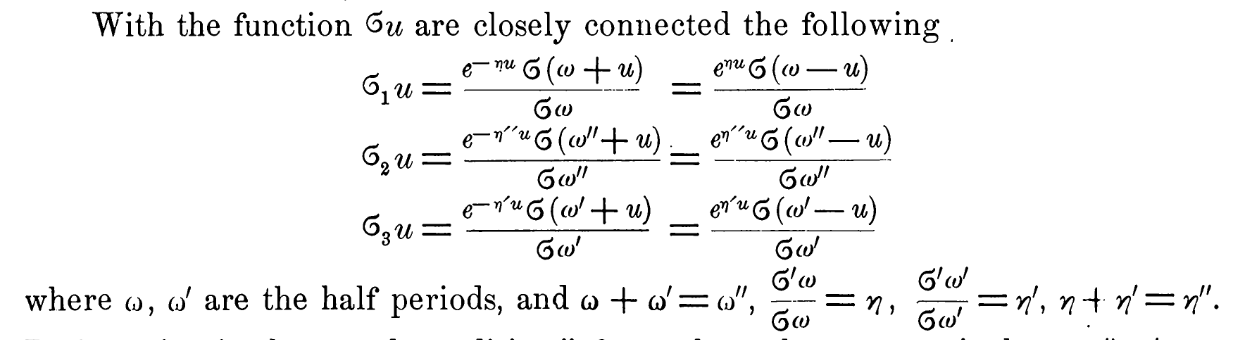

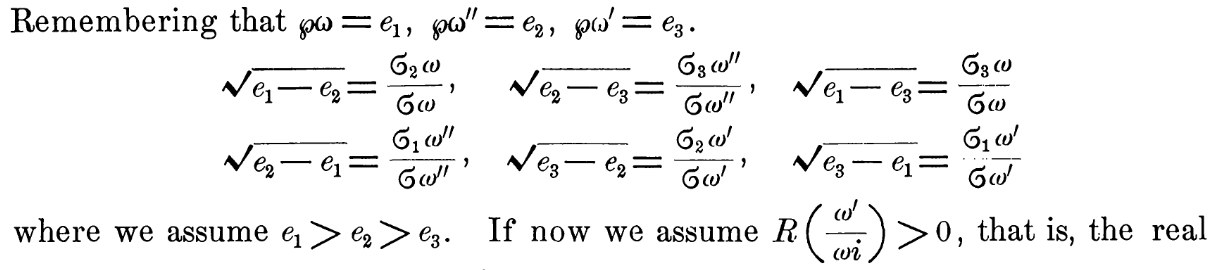
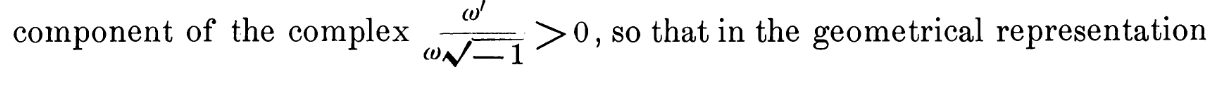
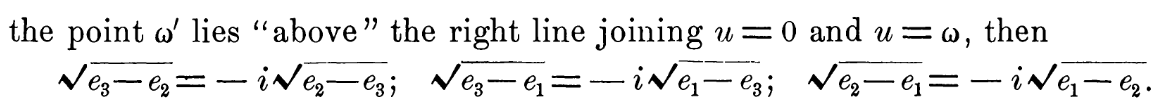
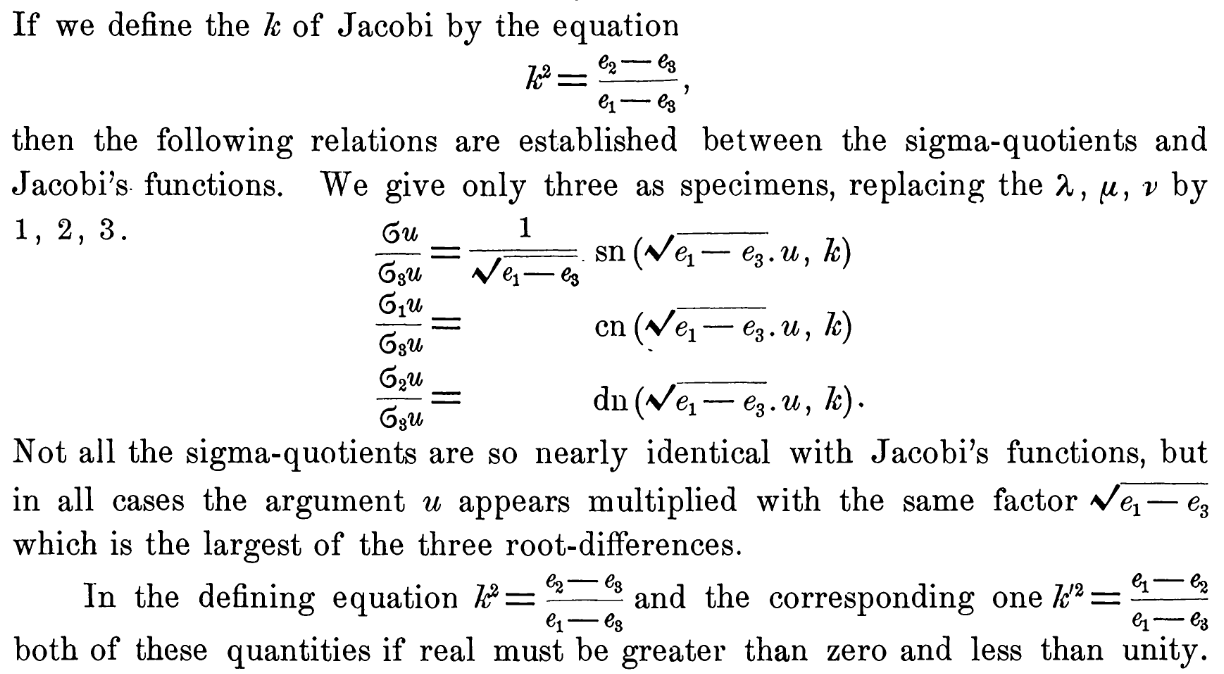

*Third Note on Weierstrass' Theory of Elliptic Functions*
https://www.jstor.org/stable/2369462?searchText=&searchUri=&ab_segments=&searchKey=&refreqid=fastly-default%3Ab5269c8645b40b5debc4e92aa374504e&seq=9
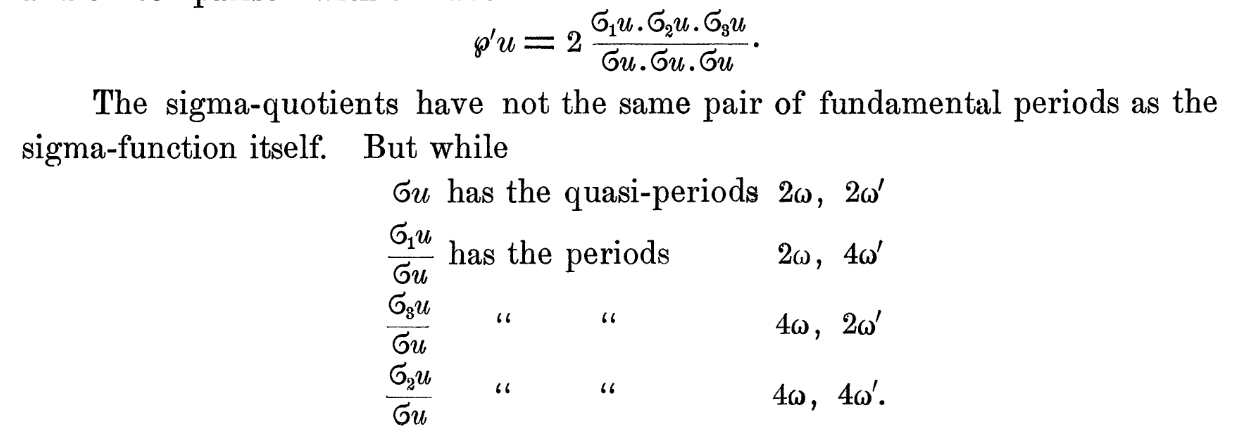
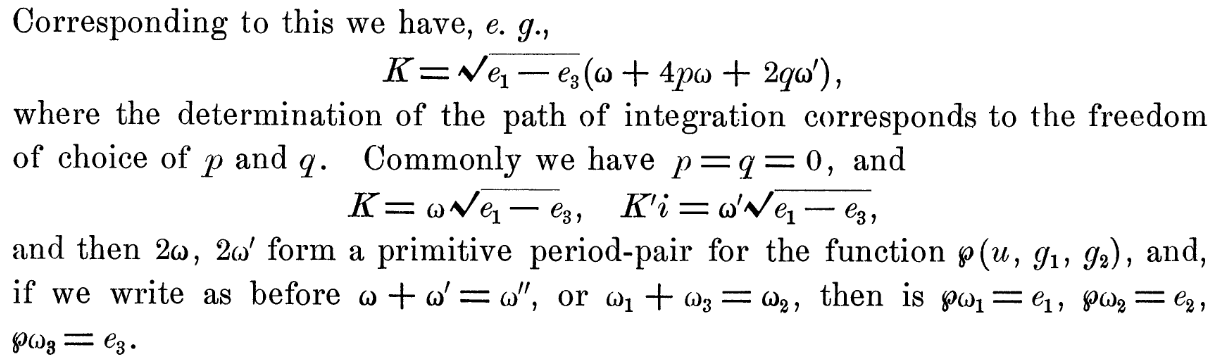
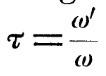

https://functions.wolfram.com/EllipticFunctions/JacobiCN/introductions/JacobiPQs/ShowAll.html
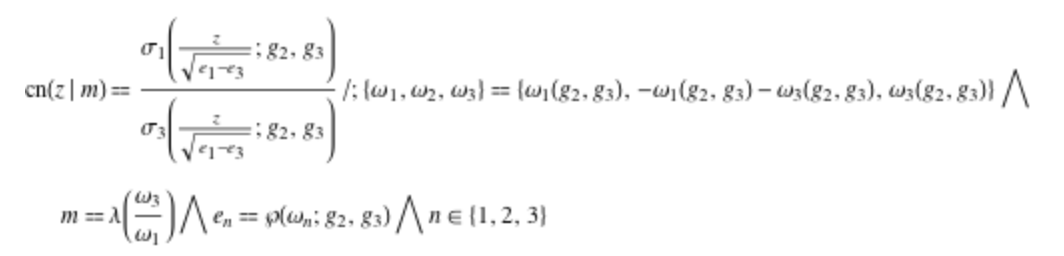
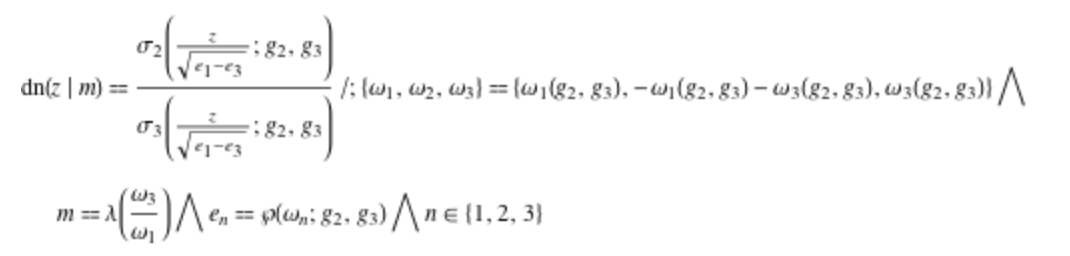
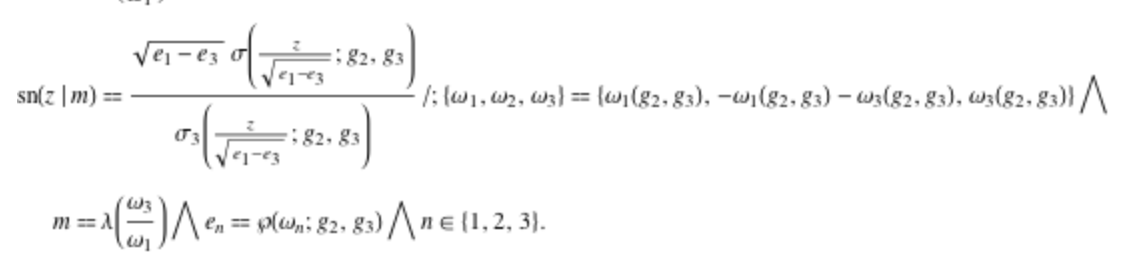

In [3]:
sn_sigma = Eq(sn(z*K/omega1,m), -sigma(omega3,g2,g3)*
   K/omega1*sigma(z,g2,g3)/sigma(z - omega3,g2,g3)*exp(-zw(omega3,g2,g3)*z)
)

cn_sigma = Eq(cn(z*K/omega1,m), exp((zw(omega1,g2,g3)-zw(omega3,g2,g3))*z)*sigma(z - omega1,g2,g3)/
   (sigma(omega1,g2,g3)*sigma(z - omega3,g2,g3)/sigma(omega3,g2,g3))
)

dn_sigma = Eq(dn(K*z/omega1, m), sigma(omega3, g2, g3)*sigma(-omega1 - omega3 + z, g2, g3)
   *exp(z*zw(omega1, g2, g3))/
   (sigma(omega1 + omega3, g2, g3)*sigma(-omega3 + z, g2, g3))
  )

sn_sqrd_sigma = (Eq(sn(z*K/omega1,m)**2, 
    (-sn_sigma.rhs*(sn_sigma.rhs.subs(z,-z))).simplify())
    .subs(sigma(z,g2,g3)**2, solve(sigma_p_identity.subs([(x,z),(y,omega3)]), sigma(z,g2,g3)**2)[0])
    .subs([(sigma(-omega3-z,g2,g3), -sigma(omega3+z,g2,g3)), (sigma(-z,g2,g3), -sigma(z,g2,g3))])
)
sn_sqrd_pw = sn_sqrd_sigma.subs(sigma(z,g2,g3)**2, 
                                solve(sigma_p_identity.subs([(y,omega3),(x,z)]), sigma(z,g2,g3)**2)[0])


K_omega1_sqrd = (sn_sqrd_sigma.subs(z,omega1)
.subs([(sigma(-omega1-omega3,g2,g3), -sigma(omega1+omega3,g2,g3))])
.subs(sigma(omega1 - omega3,g2,g3), 
      solve(quasi_period.subs([(n,0),(m,1)]).subs(z,omega1-omega3).simplify(), sigma(omega1 - omega3,g2,g3))[0]
     )
.subs(sn(K,m),1)
.subs(eta3,zw(omega3,g2,g3))
)
K_sols_plus_minus = solve(K_omega1_sqrd,K)
sn_sigma_b = Eq(sn_sigma.lhs, sn_sigma.rhs*K_sols_plus_minus[1]/K)
Ksqrd_pw = Eq(K**2, solve(sn_sqrd_pw.subs(z,omega1).subs(sn(K,m),1),K**2)[0])
sn_sqrd_pw = sn_sqrd_pw.subs(*Ksqrd_pw.args).simplify()

sn_sqrd_sigma
K_omega1_sqrd
Eq(K,K_sols_plus_minus[0])
Eq(K,K_sols_plus_minus[1])


sn_sigma
sn_sigma_b
cn_sigma
dn_sigma
sn_sqrd_pw

Eq(sn(K*z/omega1, m)**2, -K**2*sigma(omega3, g2, g3)**2*sigma(z, g2, g3)**2/(omega1**2*sigma(-omega3 + z, g2, g3)*sigma(omega3 + z, g2, g3)))

Eq(1, K**2*sigma(omega1, g2, g3)**2*sigma(omega3, g2, g3)**2*exp(2*omega1*zw(omega3, g2, g3))/(omega1**2*sigma(omega1 + omega3, g2, g3)**2))

Eq(K, -omega1*sigma(omega1 + omega3, g2, g3)*exp(-omega1*zw(omega3, g2, g3))/(sigma(omega1, g2, g3)*sigma(omega3, g2, g3)))

Eq(K, omega1*sigma(omega1 + omega3, g2, g3)*exp(-omega1*zw(omega3, g2, g3))/(sigma(omega1, g2, g3)*sigma(omega3, g2, g3)))

Eq(sn(K*z/omega1, m), -K*sigma(omega3, g2, g3)*sigma(z, g2, g3)*exp(-z*zw(omega3, g2, g3))/(omega1*sigma(-omega3 + z, g2, g3)))

Eq(sn(K*z/omega1, m), -sigma(z, g2, g3)*sigma(omega1 + omega3, g2, g3)*exp(-omega1*zw(omega3, g2, g3))*exp(-z*zw(omega3, g2, g3))/(sigma(omega1, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(cn(K*z/omega1, m), sigma(omega3, g2, g3)*sigma(-omega1 + z, g2, g3)*exp(z*(zw(omega1, g2, g3) - zw(omega3, g2, g3)))/(sigma(omega1, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(dn(K*z/omega1, m), sigma(omega3, g2, g3)*sigma(-omega1 - omega3 + z, g2, g3)*exp(z*zw(omega1, g2, g3))/(sigma(omega1 + omega3, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(sn(K*z/omega1, m)**2, (-pw(omega1, g2, g3) + pw(omega3, g2, g3))/(pw(omega3, g2, g3) - pw(z, g2, g3)))

In [4]:
# https://en.wikipedia.org/wiki/Jacobi_elliptic_functions
d_sn_eq = Eq(diff(sn(z,m),z), cn(z,m)*dn(z,m))
d_cn_eq = Eq(diff(cn(z,m),z), -sn(z,m)*dn(z,m))
d_dn_eq = Eq(diff(dn(z,m),z), -m*cn(z,m)*sn(z,m))

d_sn_eq
d_cn_eq
d_dn_eq

Eq(Derivative(sn(z, m), z), cn(z, m)*dn(z, m))

Eq(Derivative(cn(z, m), z), -dn(z, m)*sn(z, m))

Eq(Derivative(dn(z, m), z), -m*cn(z, m)*sn(z, m))

In [5]:
def mpc_to_float(mpc_val):
    return float(mpc_val.real) + float(mpc_val.imag)*1j

mpc_to_float_np = np_vectorize(mpc_to_float)

def jb_ellip_arg_scaled(_type, _omega1, _omega3):
    """
    Jacobi elliptic functions sn, cn, dn, with argument scaled so real period matches Weierstrass 2 * omega1
    """
    
    if _type not in ['sn', 'cn', 'dn']:
        raise ValueError(f"_type should be one of 'sn', 'cn', or 'dn' but received '{_type}'")
        
    _tau = _omega3/_omega1
    _K = ellipk(mfrom(tau=_tau))
    return lambda z: (ellipfun(_type, _K * z / _omega1, tau=_tau))



def jb_ellip_weierstrass_sigma(_type, _omega1, _omega3):
    """
    Jacobi elliptic functions sn, cn, dn, with argument scaled so real period matches Weierstrass 2 * omega1
    Expressed in terms of Weierstrass Sigma function ratios (Kronecker Theta functions)
    """
    
    if _type not in ['sn', 'cn', 'dn']:
        raise ValueError(f"_type should be one of 'sn', 'cn', or 'dn' but received '{_type}'")
        
    _tau = _omega3/_omega1
    _K = ellipk(mfrom(tau=_tau))
    _omegas = (_omega1, _omega1 + _omega3)
    
    if _type == 'sn':
        return lambda z: (            
            -_K / _omega1 * we.wsigma(_omega3, _omegas) * we.wsigma(z, _omegas)
            * mpexp(-z * we.wzeta(_omega3, _omegas) ) /
            we.wsigma(-_omega3 + z, _omegas)
        )
    
    if _type == 'cn':
        return lambda z: (                
            we.wsigma(_omega3, _omegas) * we.wsigma(z - _omega1, _omegas)
            * mpexp( z * (we.wzeta(_omega1, _omegas) - we.wzeta(_omega3, _omegas)) ) /
            (we.wsigma(_omega1, _omegas) * we.wsigma(-_omega3 + z, _omegas))
        )
    
    if _type == 'dn':
        return lambda z: (
            we.wsigma(_omega3, _omegas) * we.wsigma(-_omega1 - _omega3 + z, _omegas)
            * mpexp(z * we.wzeta(_omega1, _omegas) ) /
            ( we.wsigma(_omega1 + _omega3, _omegas) * we.wsigma(-_omega3 + z, _omegas) )
        )
    
def K_from_sigma_omega(_omega1, _omega3, _omegas):
    return (
        _omega1
        * we.wsigma(_omega1 + _omega3, _omegas)
        * mpexp(-_omega1 * we.wzeta(_omega3, _omegas)) / ( we.wsigma(_omega1, _omegas) * we.wsigma(_omega3, _omegas))
    )

def jb_sqrd_pw(_omega1, _omega3, _omegas):
    return lambda z: (
        (we.wp(_omega3, _omegas) - we.wp(_omega1, _omegas))/
        (we.wp(_omega3, _omegas) - we.wp(z, _omegas))
    )
    

def plot_lattice(omega1, omega2, omega3, n_points=5):
    """
    Plots the lattice for two generators omega1 and omega3
    """
    
    # Generate lattice points
    points = []
    for i in range(-n_points, n_points+1):
        for j in range(-n_points, n_points+1):
            point = i * omega1 + j * omega3
            points.append(point)
    
    # Separate real and imaginary parts
    x_coords = [p.real for p in points]
    y_coords = [p.imag for p in points]
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Plot lattice points
    ax.scatter(x_coords, y_coords, color='blue', s=30, label='Lattice Points')
    
    # Plot generators
    ax.arrow(0, 0, omega1.real, omega1.imag, color='red', width=0.02, length_includes_head=True, label='omega1')
    ax.arrow(0, 0, omega2.real, omega2.imag, color='blue', width=0.02, length_includes_head=True, label='omega2')
    ax.arrow(0, 0, omega3.real, omega3.imag, color='green', width=0.02, length_includes_head=True, label='omega3')
    
    # Set labels and title
    ax.set_xlabel('Re')
    ax.set_ylabel('Im')
    ax.set_title('Lattice Plot')
    
    # Set aspect ratio to equal
    ax.set_aspect('equal', adjustable='box')
    
    # Add legend
    ax.legend()
    
    # Show the plot
    plt.grid(True)
    plt.show()


(2.0204813619937374+0.030416172851106094j)

(3.014768953616608+1.1587263013014846j)

(0.9942875916228708+1.1283101284503787j)

mpc(real='0.096579543104266682', imag='0.99460386234882481')

(1.5003975696767193+0.550903349278343j)

(0.5003975696767194+0.5509033492783431j)

(1.9034204568957331-0.9946038623488248j)

mpc(real='0.99999999999999989', imag='0.0')

mpc(real='1.3783903539443427', imag='1.1148472619066347')

mpc(real='1.3783903539443427', imag='1.1148472619066345')

mpc(real='1.3783903539443429', imag='1.1148472619066354')

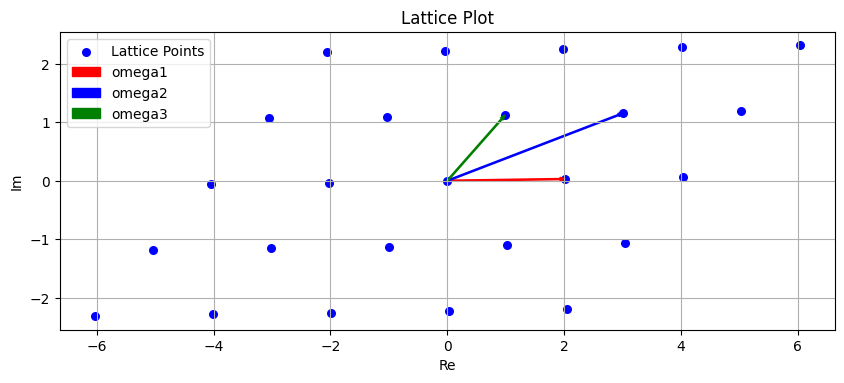

In [6]:

# g2val_ = 2.234
# g3val_ = 3.245
g2val_ = -2.234+0.13j
g3val_ = 0.245-0.0234j
omega_ = we.omega_from_g(g2val_, g3val_)
omega1_ = mpc_to_float(omega_[0])
omega2_ = mpc_to_float(omega_[1])
omega3_ = mpc_to_float(omega_[2])
if im(omega2_/omega1_) <= 0:
    omega1_ = -omega2_
    
omega1_ = omega1_ - 2*omega2_
omega2_ = omega2_ + 2*omega1_
# omega3_ = omega3_ - 2*omega2_

omegas = (omega1_, omega2_)

zVal_ = 0.234

tau_ = we.tau_from_g(g2val_, g3val_)

omega1_
omega2_
omega3_
tau_
omega2_/omega1_
omega3_/omega1_
omega2_/omega3_

# This should be equal to one
(
    jb_ellip_arg_scaled('sn', _omega1=omega1_, _omega3=omega3_)(zVal_)**2 + 
    jb_ellip_arg_scaled('cn', _omega1=omega1_, _omega3=omega3_)(zVal_)**2
)

# These shoudl be the same
K_from_sigma_omega(omega1_, omega3_, omegas)
ellipk(mfrom(tau=omega3_/omega1_))
ellipk(mfrom(
    k=sqrt((we.wp(omega2_,omegas) - we.wp(omega3_,omegas))/(we.wp(omega1_,omegas) - we.wp(omega3_,omegas))))
      )

# This should show the fundamental lattice cell
plot_lattice(omega1_, omega2_, omega3_, n_points=2)

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

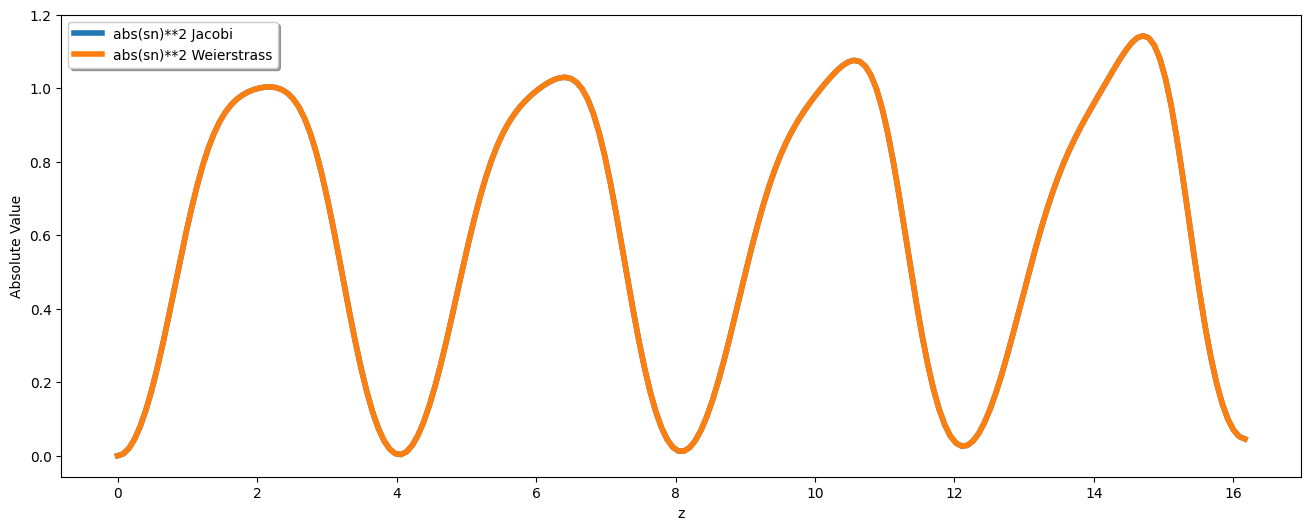

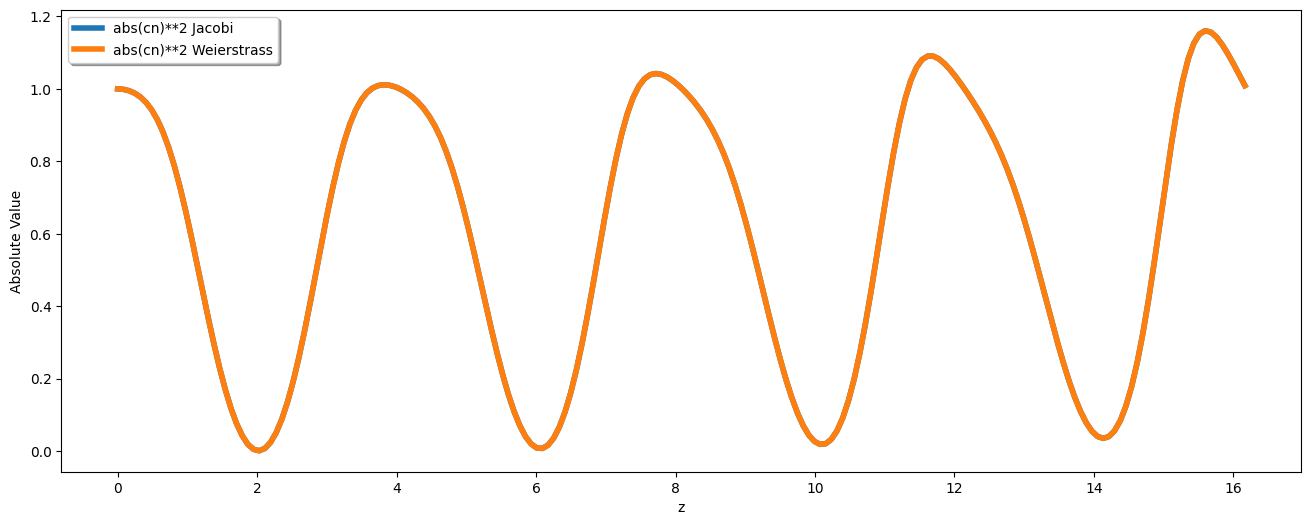

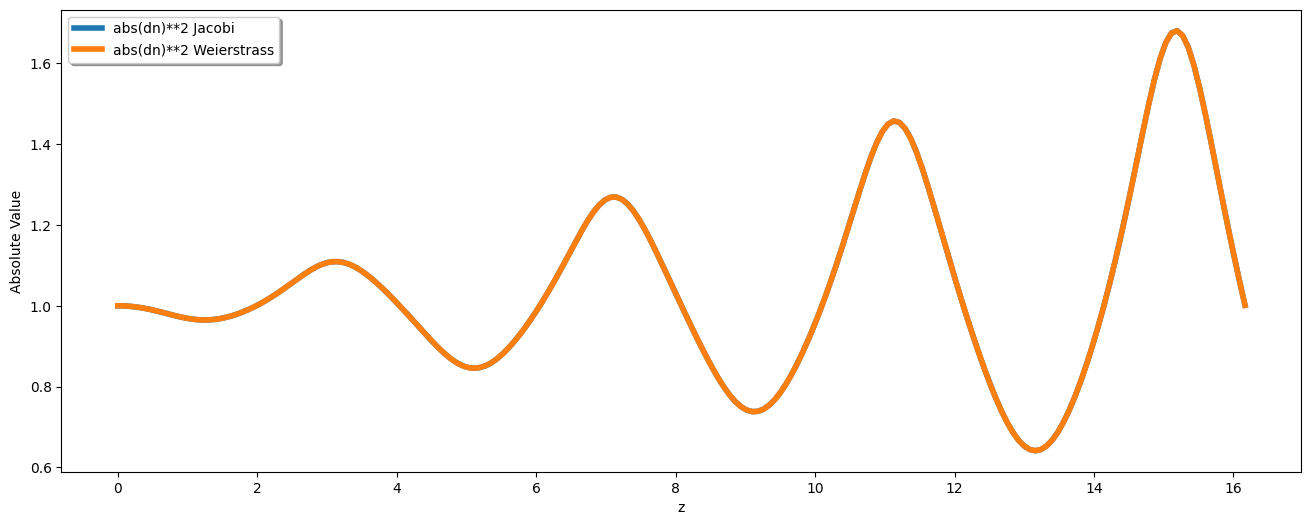

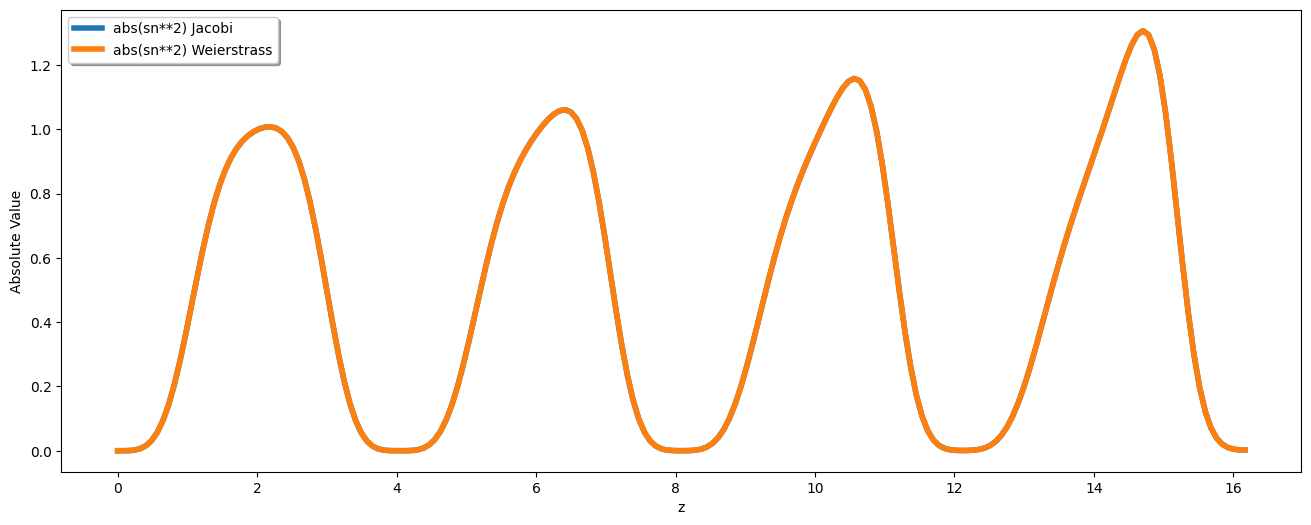

In [7]:
# Setup z array to evaluate over based on multiple periods (multiples of 2*omega1)
show_n_periods = 4
z_end = abs(show_n_periods * 2 * omega1_)
n_points_z = 200
z_eval = linspace(0, z_end, n_points_z)

# Complex valued analytic vector solution (numeric evaluation)
sn_sol_mpmath = arraynp([
    mpc_to_float_np(np_vectorize(jb_ellip_arg_scaled('sn', _omega1=omega1_, _omega3=omega3_))(z_eval)),
    mpc_to_float_np(np_vectorize(jb_ellip_weierstrass_sigma('sn', _omega1=omega1_, _omega3=omega3_))(z_eval))
])
cn_sol_mpmath = arraynp([
    mpc_to_float_np(np_vectorize(jb_ellip_arg_scaled('cn', _omega1=omega1_, _omega3=omega3_))(z_eval)),
    mpc_to_float_np(np_vectorize(jb_ellip_weierstrass_sigma('cn', _omega1=omega1_, _omega3=omega3_))(z_eval))
])
dn_sol_mpmath = arraynp([
    mpc_to_float_np(np_vectorize(jb_ellip_arg_scaled('dn', _omega1=omega1_, _omega3=omega3_))(z_eval)),
    mpc_to_float_np(np_vectorize(jb_ellip_weierstrass_sigma('dn', _omega1=omega1_, _omega3=omega3_))(z_eval))
])
sn_sol_mpmath_sqrd = arraynp([
    mpc_to_float_np(np_vectorize(jb_ellip_arg_scaled('sn', _omega1=omega1_, _omega3=omega3_))(z_eval))**2,
    mpc_to_float_np(np_vectorize(jb_sqrd_pw(_omega1=omega1_, _omega3=omega3_, _omegas=omegas))(z_eval))
])

fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, square(absolute(sn_sol_mpmath.T)), linestyle="solid", linewidth=4)  
plt.legend(['abs(sn)**2 Jacobi', 'abs(sn)**2 Weierstrass'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')

fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, square(absolute(cn_sol_mpmath.T)), linestyle="solid", linewidth=4)  
plt.legend(['abs(cn)**2 Jacobi', 'abs(cn)**2 Weierstrass'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')

fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, square(absolute(dn_sol_mpmath.T)), linestyle="solid", linewidth=4)  
plt.legend(['abs(dn)**2 Jacobi', 'abs(dn)**2 Weierstrass'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')

fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, square(absolute(sn_sol_mpmath_sqrd.T)), linestyle="solid", linewidth=4)
plt.legend(['abs(sn**2) Jacobi', 'abs(sn**2) Weierstrass'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

Text(0, 0.5, 'Absolute Value')

Text(0.5, 0, 'z')

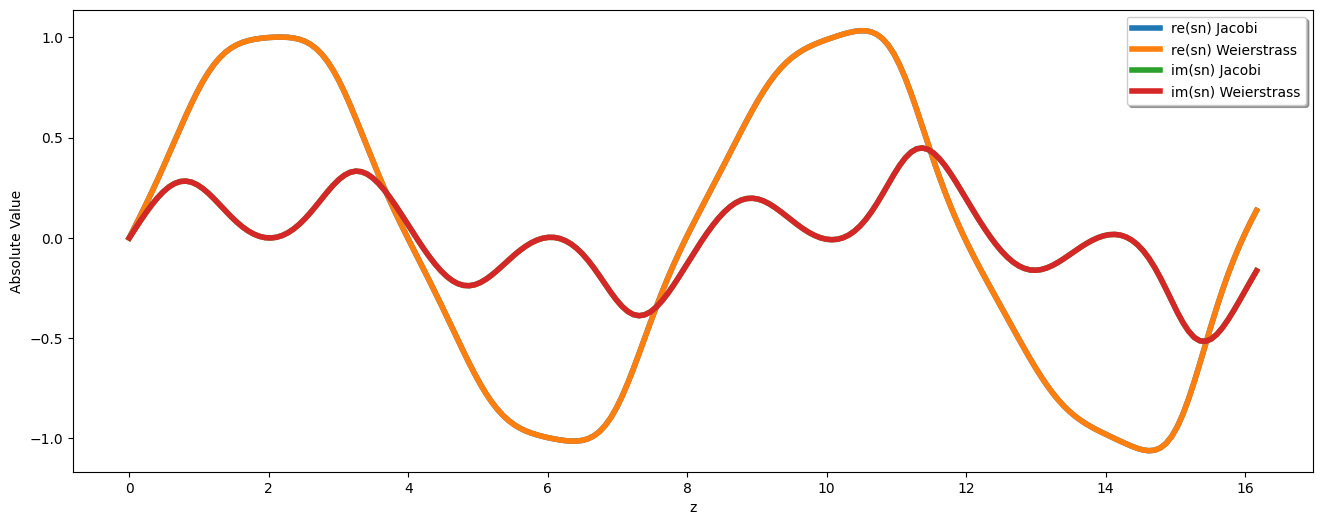

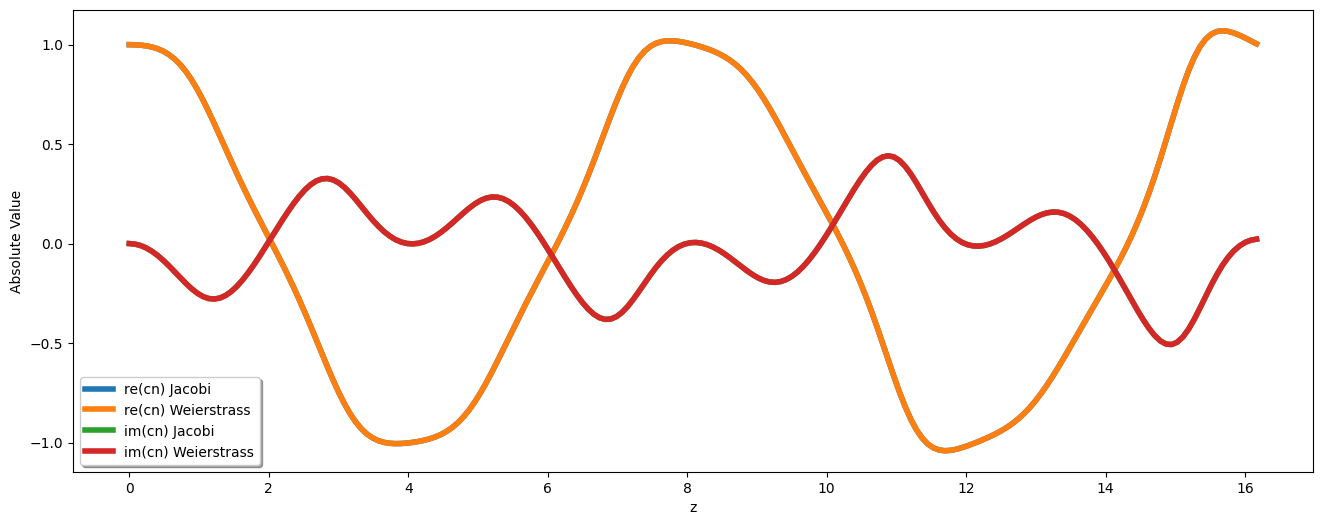

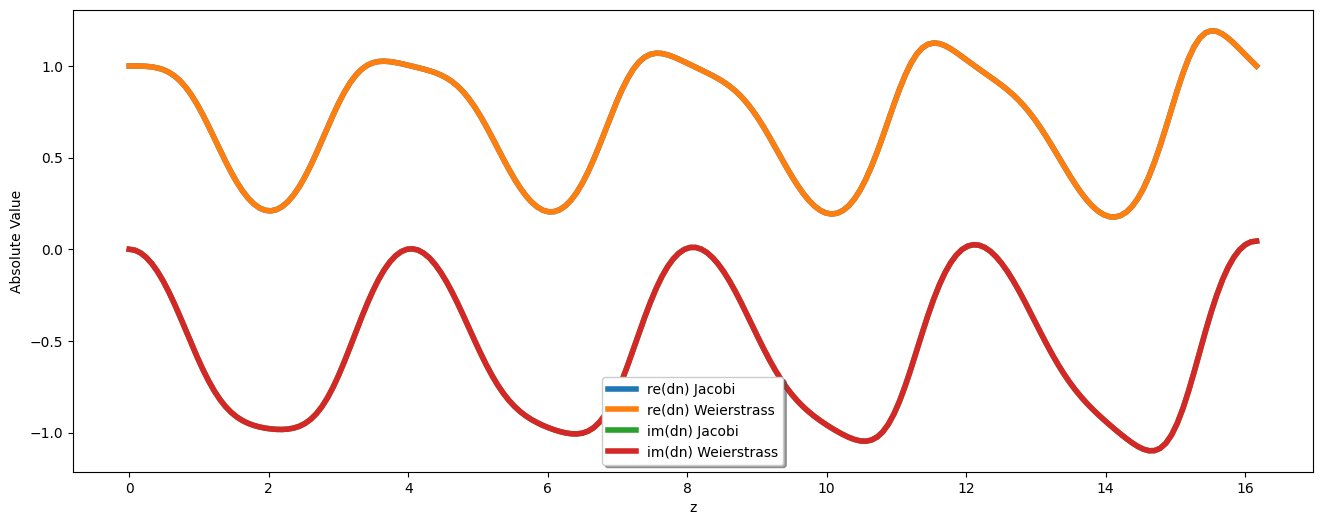

In [8]:
fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, real(sn_sol_mpmath.T), linestyle="solid", linewidth=4)
plt.plot(z_eval, imag(sn_sol_mpmath.T), linestyle="solid", linewidth=4) 
plt.legend(['re(sn) Jacobi', 're(sn) Weierstrass', 'im(sn) Jacobi', 'im(sn) Weierstrass'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')

fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, real(cn_sol_mpmath.T), linestyle="solid", linewidth=4)
plt.plot(z_eval, imag(cn_sol_mpmath.T), linestyle="solid", linewidth=4) 
plt.legend(['re(cn) Jacobi', 're(cn) Weierstrass', 'im(cn) Jacobi', 'im(cn) Weierstrass'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')

fig = plt.figure(figsize=(16, 6))
plt.plot(z_eval, real(dn_sol_mpmath.T), linestyle="solid", linewidth=4)
plt.plot(z_eval, imag(dn_sol_mpmath.T), linestyle="solid", linewidth=4) 
plt.legend(['re(dn) Jacobi', 're(dn) Weierstrass', 'im(dn) Jacobi', 'im(dn) Weierstrass'], shadow=True) 
plt.ylabel('Absolute Value')
plt.xlabel('z')

## Frobenius Stickelberger determinant formula for Kronecker theta functions

The Frobenius Stickelberger determinant formula provides a 3 mode Hamiltonian which will be used to derive a system of Kronecker theta differential equations from which the Jacobi elliptic functions will be shown to be a special degenerate case.

In [9]:
sigma_product_f_s = (
    (-1)**(N*(N-1)/2)*
    Product(factorial(k),(k,1,N))*
    sigma(Sum(mu[j],(j,0,N)),g2,g3)*
    Product(Product(Piecewise((sigma(mu[l] - mu[m], g2, g3),l<m),(1,True)),(l,0,N)),(m,0,N))/
    Product(sigma(mu[n],g2,g3)**(N+1),(n,0,N))
)

def frob_stick(Nval, evaluated=False, WPversion=False):
    """
    Frobenius Stickelberger in its original form
    """
    if evaluated:
        return Eq(p_matrix_f_s(Nval).det(), sigma_product_f_s.subs(N,Nval).doit())
    elif WPversion:
        return Eq(WPdet(Nval), sigma_product_f_s.subs(N,Nval).doit())
    return Eq(Det(p_matrix_f_s(Nval)), sigma_product_f_s.subs(N,Nval).doit())

sigma_product_f_s_N_factored = (
    (-1)**(N*(N-1)/2)*
    Product(factorial(k),(k,1,N-1))*
    factorial(N)*
    sigma(Sum(mu[j],(j,0,N)),g2,g3)*
    Product(Product(Piecewise((sigma(mu[l] - mu[m], g2, g3),l<m),(1,True)),(l,0,N-1)),(m,0,N-1))*
    Product(Piecewise((sigma(mu[l] - mu[N], g2, g3),l<N),(1,True)),(l,0,N))/
    Product(sigma(mu[n],g2,g3)**(N),(n,0,N))/
    Product(sigma(mu[n],g2,g3),(n,0,N))
)

sigma_product_f_s_N_over_N_minus_1 = (sigma_product_f_s_N_factored/sigma_product_f_s.subs(N,N-1))

subs1_list = [
    (Product(Piecewise((sigma(mu[l] - mu[N], g2, g3),l<N),(1,True)),(l,0,N)), 
     (-1)**N*Product(sigma(z - xi[l], g2, g3),(l,0,N))/sigma(z - xi[N], g2, g3)),
    (Product(sigma(mu[n],g2,g3),(n,0,N)),Product(sigma(xi[n],g2,g3),(n,0,N))*sigma(z,g2,g3)/sigma(xi[N],g2,g3)),
    (sigma(Sum(mu[j],(j,0,N-1)),g2,g3),-sigma(xi[N],g2,g3)),
    (Sum(mu[j],(j,0,N)),-xi[N]+z),
    (sigma(mu[N],g2,g3),sigma(z,g2,g3))
]
subs2_list = [
    ((-1)**(2*N)*Product(sigma(z - xi[l], g2, g3),(l,0,N)), 
   Product(sigma(z - xi[l], g2, g3)/sigma(xi[l], g2, g3)/sigma(z, g2, g3),(l,0,N)) *
   Product(sigma(xi[n], g2, g3),(n,0,N)) *
   (Product(sigma(z, g2, g3),(l,0,N)).doit()))
]

wp_sigma_product_fs_N_over_N_minus_1_mu_n = Eq(WPdet(N)/WPdet(N-1), sigma_product_f_s_N_over_N_minus_1).subs(
    Product(sigma(mu[n],g2,g3)**N,(n,0,N)),sigma(mu[N],g2,g3)**N*Product(sigma(mu[n],g2,g3)**N,(n,0,N-1))
).expand()

wp_sigma_product_fs_N_over_N_minus_1 = (
    wp_sigma_product_fs_N_over_N_minus_1_mu_n
    .subs(subs1_list)
    .subs(subs2_list)
).expand()
sigma_product_f_s_N_over_N_minus_1 = wp_sigma_product_fs_N_over_N_minus_1.rhs


def p_matrix_f_s(N): 
    return Matrix([[1, *[pw(x,g2,g3).diff((x,j)).subs(x,mu[k]) for j in range(N)]] for k in range(N+1)])

def p_matrix_f_s_1dz(N): 
    return Matrix([*[[1, *[pw(x,g2,g3).diff((x,j)).subs(x,mu[k]) for j in range(N)]] for k in range(N)],
       [1, *[pw(z,g2,g3).diff((z,j)) for j in range(N)]]])

def frob_stick_1dz_ratio(Nval, evaluated=False):
    """
    Frobenius Stickelberger adapted for Kronecker theta functions
    """
    if evaluated:
        return Eq(
            (((-1)**(Nval-1)/factorial(Nval) * p_matrix_f_s_1dz(Nval).det()/p_matrix_f_s(Nval-1).det()).expand())
                  .collect([pw(z,g2,g3), diff(pw(z,g2,g3),z)],factor), 
            (-1)**(Nval-1)/factorial(Nval) * sigma_product_f_s_N_over_N_minus_1.subs(N,Nval).doit().subs(
            xi[Nval],-Sum(xi[j],(j,0,Nval-1)).doit()
        ).subs([(xi[j],mu[j]) for j in range(Nval)]))
    
    return Eq(
        (-1)**(Nval-1)/factorial(Nval) * Det(p_matrix_f_s_1dz(Nval))/Det(p_matrix_f_s(Nval-1)), 
        
        (-1)**(Nval-1)/factorial(Nval) * sigma_product_f_s_N_over_N_minus_1.subs(N,Nval).doit().subs(
            xi[Nval],-Sum(xi[j],(j,0,Nval-1)).doit()
        ).subs([(xi[j],mu[j]) for j in range(Nval)]))

## Three mode model

In [10]:
frob_kron_3_modes = frob_stick_1dz_ratio(Nval=2, evaluated=False)
fb3mode = Eq(
    frob_kron_3_modes.lhs.replace(Det,det).expand().collect([pw(z,g2,g3),diff(pw(z,g2,g3),z)],factor),
    frob_kron_3_modes.rhs
).subs([eq.args for eq in [wpk(1)] + [wpk(1).subs(z,mu[_i]) for _i in range(2)]])

c0eq = Eq(c[0], 2*fb3mode.lhs.coeff(pw(z,g2,g3),0).coeff(pwp(z,g2,g3),0))
c1eq = Eq(c[1], 2*fb3mode.lhs.coeff(pw(z,g2,g3),1)/3)
fb3mode = fb3mode.subs([(c0eq.rhs/2, c0eq.lhs/2), (3*c1eq.rhs*pw(z,g2,g3)/2, 3*c1eq.lhs*pw(z,g2,g3)/2)])

h_3mode = Eq((fb3mode.lhs + fb3mode.lhs.subs(z,-z))
             .subs([(pwp(-z,g2,g3),-pwp(z,g2,g3)), (pw(-z,g2,g3),pw(z,g2,g3))]), 
             (fb3mode.rhs + fb3mode.rhs.subs(z,-z))
             .subs([
                 (sigma(-z-mu[0],g2,g3), -sigma(z+mu[0],g2,g3)),
                 (sigma(-z-mu[1],g2,g3), -sigma(z+mu[1],g2,g3)),
                 (sigma(-z+mu[0]+mu[1],g2,g3), -sigma(z-mu[0]-mu[1],g2,g3)),
                 (sigma(-z,g2,g3), -sigma(z,g2,g3)),
                 (sigma(-mu[0]-mu[1],g2,g3), -sigma(mu[0]+mu[1],g2,g3)),
             ])
            )
sigma_minus_subs = [
                 (sigma(-z-mu[0],g2,g3), -sigma(z+mu[0],g2,g3)),
                 (sigma(-z-mu[1],g2,g3), -sigma(z+mu[1],g2,g3)),
                 (sigma(-z+mu[0]+mu[1],g2,g3), -sigma(z-mu[0]-mu[1],g2,g3)),
                 (sigma(-z,g2,g3), -sigma(z,g2,g3)),
                 (sigma(-mu[0]-mu[1],g2,g3), -sigma(mu[0]+mu[1],g2,g3)),
             ]
d_3mode = Eq(-(fb3mode.lhs - fb3mode.lhs.subs(z,-z))
             .subs([(pwp(-z,g2,g3),-pwp(z,g2,g3)), (pw(-z,g2,g3),pw(z,g2,g3))]), 
             -(fb3mode.rhs - fb3mode.rhs.subs(z,-z))
             .subs(sigma_minus_subs)
            )

pz_mu0 = sigma_p_identity.subs([(x,z),(y,mu[0])])
pz_mu1 = sigma_p_identity.subs([(x,z),(y,mu[1])])
pz_mu0_mu1 = sigma_p_identity.subs([(x,z),(y,mu[0]+mu[1])])
pmu_terms_summed = pw(mu[0],g2,g3) + pw(mu[1],g2,g3) + pw(mu[0] + mu[1],g2,g3)
pz_sigma_mu0_mu1 = Eq(
    -(pz_mu0.lhs + pz_mu1.lhs + pz_mu0_mu1.lhs) + pmu_terms_summed, 
    -(pz_mu0.rhs + pz_mu1.rhs + pz_mu0_mu1.rhs) + pmu_terms_summed
)
pw_sum_mu = Eq(
    pw_xy_addition.lhs + pw(x,g2,g3) + pw(y,g2,g3), 
    pw_xy_addition.rhs + pw(x,g2,g3) + pw(y,g2,g3)
).subs([(x,mu[0]),(y,mu[1])])
pw_sum_mu_c1 = Eq(pw_sum_mu.lhs, 
                  pw_sum_mu.rhs.subs(pwp(mu[0],g2,g3), solve(c1eq, pwp(mu[0],g2,g3))[0]).simplify())

pz_c1_sigma = pz_sigma_mu0_mu1.subs(*pw_sum_mu_c1.args)
pz_c1_sigma = Eq(pz_c1_sigma.lhs/3, pz_c1_sigma.rhs/3)

h_sigma_c = Eq(
    h_3mode.lhs - 3*pz_c1_sigma.lhs*c[1] + 9*c[1]**3/4, 
    h_3mode.rhs - 3*pz_c1_sigma.rhs*c[1] + 9*c[1]**3/4
).expand()

p_c_eq = Eq(p[0], c[0] + 9*c[1]**3/4)

p_sigma_ham = h_sigma_c.subs(c[0], solve(p_c_eq,c[0])[0])

T_sigma = Eq(T(z), sigma(z-mu[0],g2,g3)/sigma(z,g2,g3)/sigma(mu[0],g2,g3))
U_sigma = Eq(U(z), sigma(z-mu[1],g2,g3)/sigma(z,g2,g3)/sigma(mu[1],g2,g3))
V_sigma = Eq(V(z), -sigma(z+mu[0]+mu[1],g2,g3)/sigma(z,g2,g3)/sigma(mu[0]+mu[1],g2,g3))
Tc_sigma = Eq(Tc(z), T_sigma.rhs.subs(z,-z).subs(sigma_minus_subs))
Uc_sigma = Eq(Uc(z), U_sigma.rhs.subs(z,-z).subs(sigma_minus_subs))
Vc_sigma = Eq(Vc(z), V_sigma.rhs.subs(z,-z).subs(sigma_minus_subs))
sigma_TUV_subs = [
    (sigma(z-mu[0],g2,g3), solve(T_sigma, sigma(z-mu[0],g2,g3))[0]),
    (sigma(z-mu[1],g2,g3), solve(U_sigma, sigma(z-mu[1],g2,g3))[0]),
    (sigma(z+mu[0]+mu[1],g2,g3), solve(V_sigma, sigma(z+mu[0]+mu[1],g2,g3))[0]),
    (sigma(z+mu[0],g2,g3), solve(Tc_sigma, sigma(z+mu[0],g2,g3))[0]),
    (sigma(z+mu[1],g2,g3), solve(Uc_sigma, sigma(z+mu[1],g2,g3))[0]),
    (sigma(z-mu[0]-mu[1],g2,g3), solve(Vc_sigma, sigma(z-mu[0]-mu[1],g2,g3))[0]),
]
p_sigma_ham = Eq(p_sigma_ham.lhs, p_sigma_ham.rhs.subs(sigma_TUV_subs).collect(c[1],factor))

frob_kron_3_modes
c0eq
c1eq
fb3mode
d_3mode
h_3mode

pz_mu0
pz_mu1
pz_mu0_mu1
pz_sigma_mu0_mu1
pw_sum_mu
pw_sum_mu_c1
pz_c1_sigma
h_sigma_c
p_c_eq

T_sigma
U_sigma
V_sigma
Tc_sigma
Uc_sigma
Vc_sigma
p_sigma_ham

Eq(-Det(Matrix([
[1, pw(mu[0], g2, g3), Derivative(pw(mu[0], g2, g3), mu[0])],
[1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1])],
[1,     pw(z, g2, g3),         Derivative(pw(z, g2, g3), z)]]))*Det(Matrix([
[1, pw(mu[0], g2, g3)],
[1, pw(mu[1], g2, g3)]]))**(-1)/2, -sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(-mu[0] - mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)))

Eq(c[0], -(-pw(mu[0], g2, g3)*pwp(mu[1], g2, g3) + pw(mu[1], g2, g3)*pwp(mu[0], g2, g3))/(pw(mu[0], g2, g3) - pw(mu[1], g2, g3)))

Eq(c[1], (pwp(mu[0], g2, g3) - pwp(mu[1], g2, g3))/(3*(pw(mu[0], g2, g3) - pw(mu[1], g2, g3))))

Eq(3*pw(z, g2, g3)*c[1]/2 - pwp(z, g2, g3)/2 + c[0]/2, -sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(-mu[0] - mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)))

Eq(pwp(z, g2, g3), -sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(mu[0] + mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)) + sigma(z + mu[0], g2, g3)*sigma(z + mu[1], g2, g3)*sigma(z - mu[0] - mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(mu[0] + mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)))

Eq(3*pw(z, g2, g3)*c[1] + c[0], sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(mu[0] + mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)) + sigma(z + mu[0], g2, g3)*sigma(z + mu[1], g2, g3)*sigma(z - mu[0] - mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(mu[0] + mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)))

Eq(-pw(z, g2, g3) + pw(mu[0], g2, g3), sigma(z - mu[0], g2, g3)*sigma(z + mu[0], g2, g3)/(sigma(z, g2, g3)**2*sigma(mu[0], g2, g3)**2))

Eq(-pw(z, g2, g3) + pw(mu[1], g2, g3), sigma(z - mu[1], g2, g3)*sigma(z + mu[1], g2, g3)/(sigma(z, g2, g3)**2*sigma(mu[1], g2, g3)**2))

Eq(-pw(z, g2, g3) + pw(mu[0] + mu[1], g2, g3), sigma(z - mu[0] - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**2*sigma(mu[0] + mu[1], g2, g3)**2))

Eq(3*pw(z, g2, g3), pw(mu[0] + mu[1], g2, g3) + pw(mu[0], g2, g3) + pw(mu[1], g2, g3) - sigma(z - mu[0], g2, g3)*sigma(z + mu[0], g2, g3)/(sigma(z, g2, g3)**2*sigma(mu[0], g2, g3)**2) - sigma(z - mu[1], g2, g3)*sigma(z + mu[1], g2, g3)/(sigma(z, g2, g3)**2*sigma(mu[1], g2, g3)**2) - sigma(z - mu[0] - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**2*sigma(mu[0] + mu[1], g2, g3)**2))

Eq(pw(mu[0] + mu[1], g2, g3) + pw(mu[0], g2, g3) + pw(mu[1], g2, g3), (pwp(mu[0], g2, g3) - pwp(mu[1], g2, g3))**2/(4*(pw(mu[0], g2, g3) - pw(mu[1], g2, g3))**2))

Eq(pw(mu[0] + mu[1], g2, g3) + pw(mu[0], g2, g3) + pw(mu[1], g2, g3), 9*c[1]**2/4)

Eq(pw(z, g2, g3), 3*c[1]**2/4 - sigma(z - mu[0], g2, g3)*sigma(z + mu[0], g2, g3)/(3*sigma(z, g2, g3)**2*sigma(mu[0], g2, g3)**2) - sigma(z - mu[1], g2, g3)*sigma(z + mu[1], g2, g3)/(3*sigma(z, g2, g3)**2*sigma(mu[1], g2, g3)**2) - sigma(z - mu[0] - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(3*sigma(z, g2, g3)**2*sigma(mu[0] + mu[1], g2, g3)**2))

Eq(c[0] + 9*c[1]**3/4, sigma(z - mu[0], g2, g3)*sigma(z + mu[0], g2, g3)*c[1]/(sigma(z, g2, g3)**2*sigma(mu[0], g2, g3)**2) + sigma(z - mu[1], g2, g3)*sigma(z + mu[1], g2, g3)*c[1]/(sigma(z, g2, g3)**2*sigma(mu[1], g2, g3)**2) + sigma(z - mu[0] - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)*c[1]/(sigma(z, g2, g3)**2*sigma(mu[0] + mu[1], g2, g3)**2) + sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(mu[0] + mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)) + sigma(z + mu[0], g2, g3)*sigma(z + mu[1], g2, g3)*sigma(z - mu[0] - mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(mu[0] + mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)))

Eq(p[0], c[0] + 9*c[1]**3/4)

Eq(T(z), sigma(z - mu[0], g2, g3)/(sigma(z, g2, g3)*sigma(mu[0], g2, g3)))

Eq(U(z), sigma(z - mu[1], g2, g3)/(sigma(z, g2, g3)*sigma(mu[1], g2, g3)))

Eq(V(z), -sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)*sigma(mu[0] + mu[1], g2, g3)))

Eq(Tc(z), sigma(z + mu[0], g2, g3)/(sigma(z, g2, g3)*sigma(mu[0], g2, g3)))

Eq(Uc(z), sigma(z + mu[1], g2, g3)/(sigma(z, g2, g3)*sigma(mu[1], g2, g3)))

Eq(Vc(z), -sigma(z - mu[0] - mu[1], g2, g3)/(sigma(z, g2, g3)*sigma(mu[0] + mu[1], g2, g3)))

Eq(p[0], (T(z)*Tc(z) + U(z)*Uc(z) + V(z)*Vc(z))*c[1] - T(z)*U(z)*V(z) - Tc(z)*Uc(z)*Vc(z))

In [11]:
p1_conserved = Eq(p[1], U(z)*Uc(z) - V(z)*Vc(z))
p2_conserved = Eq(p[2], U(z)*Uc(z) - T(z)*Tc(z))
p3_conserved = Eq(p[3], V(z)*Vc(z) - T(z)*Tc(z))
p3_conserved_b = Eq(p3_conserved.lhs, 
                    p3_conserved.rhs 
                    + (p2_conserved.lhs - p2_conserved.rhs)  
                    - (p1_conserved.lhs - p1_conserved.rhs)
                   )

dU = Eq(diff(U(z),z), diff(p_sigma_ham.rhs, Uc(z)))
dV = Eq(diff(V(z),z), diff(p_sigma_ham.rhs, Vc(z)))
dT = Eq(diff(T(z),z), diff(p_sigma_ham.rhs, Tc(z)))
dUc = Eq(diff(Uc(z),z), -diff(p_sigma_ham.rhs, U(z)))
dVc = Eq(diff(Vc(z),z), -diff(p_sigma_ham.rhs, V(z)))
dTc = Eq(diff(Tc(z),z), -diff(p_sigma_ham.rhs, T(z)))

diff_eq_subs = [dU.args, dV.args, dT.args, dUc.args, dVc.args, dTc.args]
dUsqrd = Eq(Derivative(U(z)*Uc(z),z)**2, diff(U(z)*Uc(z),z).subs(diff_eq_subs).expand()**2)
dVsqrd = Eq(Derivative(V(z)*Vc(z),z)**2, diff(V(z)*Vc(z),z).subs(diff_eq_subs).expand()**2)
dTsqrd = Eq(Derivative(T(z)*Tc(z),z)**2, diff(T(z)*Tc(z),z).subs(diff_eq_subs).expand()**2)

fwm_sqrd = Eq(
    (p_sigma_ham.rhs - (p_sigma_ham.rhs - p_sigma_ham.rhs.subs(c[1],0)))**2,
    (p_sigma_ham.lhs - (p_sigma_ham.rhs - p_sigma_ham.rhs.subs(c[1],0)))**2
  )
fwm_sqrd_b = Eq(fwm_sqrd.lhs, (T(z)*U(z)*V(z) - Tc(z)*Uc(z)*Vc(z))**2 + 4*T(z)*U(z)*V(z)*Tc(z)*Uc(z)*Vc(z))

fwm_sqrd_c = fwm_sqrd.subs(*fwm_sqrd_b.args)
fwm_sqrd_c = Eq(fwm_sqrd_c.lhs - 4*T(z)*U(z)*V(z)*Tc(z)*Uc(z)*Vc(z),
                (fwm_sqrd_c.rhs - 4*T(z)*U(z)*V(z)*Tc(z)*Uc(z)*Vc(z)).expand()
               )

U_only_subs = [(V(z), solve(p1_conserved,V(z))[0]), (T(z), solve(p2_conserved,T(z))[0])]
V_only_subs = [(U(z), solve(p1_conserved,U(z))[0]), (T(z), solve(p3_conserved,T(z))[0])]
T_only_subs = [(U(z), solve(p2_conserved,U(z))[0]), (V(z), solve(p3_conserved,V(z))[0])]
U_only_subs_c = [(Vc(z), solve(p1_conserved,Vc(z))[0]), (Tc(z), solve(p2_conserved,Tc(z))[0])]
V_only_subs_c = [(Uc(z), solve(p1_conserved,Uc(z))[0]), (Tc(z), solve(p3_conserved,Tc(z))[0])]
T_only_subs_c = [(Uc(z), solve(p2_conserved,Uc(z))[0]), (Vc(z), solve(p3_conserved,Vc(z))[0])]

fwm_sqrd_U = Eq(fwm_sqrd_c.lhs, 
                fwm_sqrd_c.rhs
                .subs(U_only_subs)
                .subs(*p3_conserved_b.args)
                .expand().collect(U(z),factor)
               )
fwm_sqrd_V = Eq(fwm_sqrd_c.lhs, 
                fwm_sqrd_c.rhs
                .subs(V_only_subs)
                .subs(*p3_conserved_b.args)
                .expand().collect(V(z),factor)
               )
fwm_sqrd_T = Eq(fwm_sqrd_c.lhs, 
                fwm_sqrd_c.rhs
                .subs(T_only_subs)
                .subs(*p3_conserved_b.args)
                .expand().collect(T(z),factor)
               )

dUUc = Eq(dU.lhs*Uc(z) + dUc.lhs*U(z), (dU.rhs*Uc(z) + dUc.rhs*U(z)).expand())
dVVc = Eq(dV.lhs*Vc(z) + dVc.lhs*V(z), (dV.rhs*Vc(z) + dVc.rhs*V(z)).expand())
dTTc = Eq(dT.lhs*Tc(z) + dTc.lhs*T(z), (dT.rhs*Tc(z) + dTc.rhs*T(z)).expand())

dUsqrd = dUsqrd.subs(*fwm_sqrd_U.args)
dVsqrd = dVsqrd.subs(*fwm_sqrd_V.args)
dTsqrd = dTsqrd.subs(*fwm_sqrd_T.args)

a_sub_U = solve(dUsqrd.rhs.subs(Uc(z),(a-W(z))/U(z)).doit().expand().collect(W(z)).coeff(W(z),2),a)[0]
dUdW = dUsqrd.subs(Uc(z),(a_sub_U-W(z))/U(z)).doit()
dUdW = Eq(dUdW.lhs, dUdW.rhs.expand().collect(W(z)))

a_sub_V = solve(dVsqrd.rhs.subs(Vc(z),(a-W(z))/V(z)).doit().expand().collect(W(z)).coeff(W(z),2),a)[0]
dVdW = dVsqrd.subs(Vc(z),(a_sub_V-W(z))/V(z)).doit()
dVdW = Eq(dVdW.lhs, dVdW.rhs.expand().collect(W(z)))

a_sub_T = solve(dTsqrd.rhs.subs(Tc(z),(a-W(z))/T(z)).doit().expand().collect(W(z)).coeff(W(z),2),a)[0]
dTdW = dTsqrd.subs(Tc(z),(a_sub_T-W(z))/T(z)).doit()
dTdW = Eq(dTdW.lhs, dTdW.rhs.expand().collect(W(z)))

g2_cp = Eq(g2, -dUdW.rhs.coeff(W(z)))
g3_cp = Eq(g3, -dUdW.rhs.coeff(W(z),0))
dUdW = dUdW.subs([(g2_cp.rhs, g2_cp.lhs), (g3_cp.rhs, g3_cp.lhs)])
dWp = Eq(W(z), pw(z - z0,g2,g3))

dUUc_pw = Eq(U(z)*Uc(z), (a - W(z)).subs([dWp.args, (a, a_sub_U)]))
dVVc_pw = Eq(V(z)*Vc(z), (a - W(z)).subs([dWp.args, (a, a_sub_V)]))
dTTc_pw = Eq(T(z)*Tc(z), (a - W(z)).subs([dWp.args, (a, a_sub_T)]))

p_sigma_ham
p1_conserved
p2_conserved
p3_conserved
p3_conserved_b

dU
dV
dT
dUc
dVc
dTc

dUUc
dVVc
dTTc

dUsqrd
dVsqrd
dTsqrd

g2_cp
g3_cp
dUdW
dWp
dUUc_pw
dVVc_pw
dTTc_pw


# Conserved quantities check
Eq(dUUc_pw.rhs - dVVc_pw.rhs, dUUc_pw.lhs - dVVc_pw.lhs)
Eq(dUUc_pw.rhs - dTTc_pw.rhs, dUUc_pw.lhs - dTTc_pw.lhs)
Eq(dVVc_pw.rhs - dTTc_pw.rhs, dVVc_pw.lhs - dTTc_pw.lhs).subs(p[2], solve(p3_conserved_b,p[2])[0])

diff(p_sigma_ham.rhs,z).subs(diff_eq_subs).simplify() == 0
diff(p1_conserved.rhs,z).subs(diff_eq_subs).simplify() == 0
diff(p2_conserved.rhs,z).subs(diff_eq_subs).simplify() == 0
diff(p3_conserved.rhs,z).subs(diff_eq_subs).simplify() == 0

dUdW.rhs == dUdW.rhs
dUdW.lhs == dUdW.lhs
dVdW.rhs == dVdW.rhs
dVdW.lhs == dVdW.lhs
dTdW.rhs == dTdW.rhs
dTdW.lhs == dTdW.lhs

Eq(p[0], (T(z)*Tc(z) + U(z)*Uc(z) + V(z)*Vc(z))*c[1] - T(z)*U(z)*V(z) - Tc(z)*Uc(z)*Vc(z))

Eq(p[1], U(z)*Uc(z) - V(z)*Vc(z))

Eq(p[2], -T(z)*Tc(z) + U(z)*Uc(z))

Eq(p[3], -T(z)*Tc(z) + V(z)*Vc(z))

Eq(p[3], -p[1] + p[2])

Eq(Derivative(U(z), z), -Tc(z)*Vc(z) + U(z)*c[1])

Eq(Derivative(V(z), z), -Tc(z)*Uc(z) + V(z)*c[1])

Eq(Derivative(T(z), z), T(z)*c[1] - Uc(z)*Vc(z))

Eq(Derivative(Uc(z), z), T(z)*V(z) - Uc(z)*c[1])

Eq(Derivative(Vc(z), z), T(z)*U(z) - Vc(z)*c[1])

Eq(Derivative(Tc(z), z), -Tc(z)*c[1] + U(z)*V(z))

Eq(U(z)*Derivative(Uc(z), z) + Uc(z)*Derivative(U(z), z), T(z)*U(z)*V(z) - Tc(z)*Uc(z)*Vc(z))

Eq(V(z)*Derivative(Vc(z), z) + Vc(z)*Derivative(V(z), z), T(z)*U(z)*V(z) - Tc(z)*Uc(z)*Vc(z))

Eq(T(z)*Derivative(Tc(z), z) + Tc(z)*Derivative(T(z), z), T(z)*U(z)*V(z) - Tc(z)*Uc(z)*Vc(z))

Eq(Derivative(U(z)*Uc(z), z)**2, (c[1]*p[1] + c[1]*p[2] + p[0])**2 + (9*c[1]**2 + 4*p[1] + 4*p[2])*U(z)**2*Uc(z)**2 - 2*(3*c[1]**2*p[1] + 3*c[1]**2*p[2] + 3*c[1]*p[0] + 2*p[1]*p[2])*U(z)*Uc(z) - 4*U(z)**3*Uc(z)**3)

Eq(Derivative(V(z)*Vc(z), z)**2, (2*c[1]*p[1] - c[1]*p[2] - p[0])**2 + (9*c[1]**2 - 8*p[1] + 4*p[2])*V(z)**2*Vc(z)**2 + 2*(6*c[1]**2*p[1] - 3*c[1]**2*p[2] - 3*c[1]*p[0] - 2*p[1]**2 + 2*p[1]*p[2])*V(z)*Vc(z) - 4*V(z)**3*Vc(z)**3)

Eq(Derivative(T(z)*Tc(z), z)**2, (c[1]*p[1] - 2*c[1]*p[2] + p[0])**2 + (9*c[1]**2 + 4*p[1] - 8*p[2])*T(z)**2*Tc(z)**2 - 2*(3*c[1]**2*p[1] - 6*c[1]**2*p[2] + 3*c[1]*p[0] - 2*p[1]*p[2] + 2*p[2]**2)*T(z)*Tc(z) - 4*T(z)**3*Tc(z)**3)

Eq(g2, 27*c[1]**4/4 - 6*c[1]*p[0] + 4*p[1]**2/3 - 4*p[1]*p[2]/3 + 4*p[2]**2/3)

Eq(g3, -27*c[1]**6/8 + 9*c[1]**3*p[0]/2 - c[1]**2*p[1]**2 + c[1]**2*p[1]*p[2] - c[1]**2*p[2]**2 - p[0]**2 - 8*p[1]**3/27 + 4*p[1]**2*p[2]/9 + 4*p[1]*p[2]**2/9 - 8*p[2]**3/27)

Eq(Derivative(W(z), z)**2, -g2*W(z) - g3 + 4*W(z)**3)

Eq(W(z), pw(z - z0, g2, g3))

Eq(U(z)*Uc(z), -pw(z - z0, g2, g3) + 3*c[1]**2/4 + p[1]/3 + p[2]/3)

Eq(V(z)*Vc(z), -pw(z - z0, g2, g3) + 3*c[1]**2/4 - 2*p[1]/3 + p[2]/3)

Eq(T(z)*Tc(z), -pw(z - z0, g2, g3) + 3*c[1]**2/4 + p[1]/3 - 2*p[2]/3)

Eq(p[1], U(z)*Uc(z) - V(z)*Vc(z))

Eq(p[2], -T(z)*Tc(z) + U(z)*Uc(z))

Eq(p[3], -T(z)*Tc(z) + V(z)*Vc(z))

True

True

True

True

True

True

True

True

True

True

In [12]:
TUV_dU = Eq(dUUc.lhs + p_sigma_ham.lhs, (dUUc.rhs + p_sigma_ham.rhs).subs(U_only_subs))
TUV_dU = Eq(-(TUV_dU.rhs - TUV_dU.rhs.coeff(c[1])*c[1])/2,
            (-(TUV_dU.lhs - TUV_dU.rhs.coeff(c[1])*c[1])/2).expand()
           )

TUV_dV = Eq(dVVc.lhs + p_sigma_ham.lhs, (dVVc.rhs + p_sigma_ham.rhs).subs(V_only_subs))
TUV_dV = Eq(-(TUV_dV.rhs - TUV_dV.rhs.coeff(c[1])*c[1])/2,
            (-(TUV_dV.lhs - TUV_dV.rhs.coeff(c[1])*c[1])/2).expand()
           )

TUV_dT = Eq(dTTc.lhs + p_sigma_ham.lhs, (dTTc.rhs + p_sigma_ham.rhs).subs(T_only_subs))
TUV_dT = Eq(-(TUV_dT.rhs - TUV_dT.rhs.coeff(c[1])*c[1])/2,
            (-(TUV_dT.lhs - TUV_dT.rhs.coeff(c[1])*c[1])/2).expand()
           )

TUV_dU_c = Eq(dUUc.lhs - p_sigma_ham.lhs, (dUUc.rhs - p_sigma_ham.rhs).subs(U_only_subs_c))
TUV_dU_c = Eq(((TUV_dU_c.rhs - TUV_dU_c.rhs.coeff(c[1])*c[1])/2).expand(),
            ((TUV_dU_c.lhs - TUV_dU_c.rhs.coeff(c[1])*c[1])/2).expand()
           )

TUV_dV_c = Eq(dVVc.lhs - p_sigma_ham.lhs, (dVVc.rhs - p_sigma_ham.rhs).subs(V_only_subs_c))
TUV_dV_c = Eq(((TUV_dV_c.rhs - TUV_dV_c.rhs.coeff(c[1])*c[1])/2).expand(),
            ((TUV_dV_c.lhs - TUV_dV_c.rhs.coeff(c[1])*c[1])/2).expand()
           )

TUV_dT_c = Eq(dTTc.lhs - p_sigma_ham.lhs, (dTTc.rhs - p_sigma_ham.rhs).subs(T_only_subs_c))
TUV_dT_c = Eq(((TUV_dT_c.rhs - TUV_dT_c.rhs.coeff(c[1])*c[1])/2).expand(),
            ((TUV_dT_c.lhs - TUV_dT_c.rhs.coeff(c[1])*c[1])/2).expand()
           )

## --

dU_ln_a = Eq(dU.lhs/U(z), ((dU.rhs*Uc(z)).expand().subs(*TUV_dU.args)/Uc(z)/U(z)).expand())
dU_ln_b = Eq(dU_ln_a.lhs, 
                 apart(
                     dU_ln_a.rhs.subs(Uc(z), solve(dUUc_pw.subs(z0,0), Uc(z))[0]).doit().simplify()
                     .subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))
                     .subs(z,z-z0),
                     pw(z - z0,g2,g3)
                 )  
            )

dV_ln_a = Eq(dV.lhs/V(z), ((dV.rhs*Vc(z)).expand().subs(*TUV_dV.args)/Vc(z)/V(z)).expand())
dV_ln_b = Eq(dV_ln_a.lhs, 
                 apart(
                     dV_ln_a.rhs.subs(Vc(z), solve(dVVc_pw.subs(z0,0), Vc(z))[0]).doit().simplify()
                     .subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))
                     .subs(z,z-z0),
                     pw(z - z0,g2,g3)
                 )  
            )

dT_ln_a = Eq(dT.lhs/T(z), ((dT.rhs*Tc(z)).expand().subs(*TUV_dT.args)/Tc(z)/T(z)).expand())
dT_ln_b = Eq(dT_ln_a.lhs, 
                 apart(
                     dT_ln_a.rhs.subs(Tc(z), solve(dTTc_pw.subs(z0,0), Tc(z))[0]).doit().simplify()
                     .subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))
                     .subs(z,z-z0),
                     pw(z - z0,g2,g3)
                 )  
            )

dUc_ln_a = Eq(dUc.lhs/Uc(z), ((dUc.rhs*U(z)).expand().subs(*TUV_dU_c.args)/Uc(z)/U(z)).expand())
dUc_ln_b = Eq(dUc_ln_a.lhs, 
                 apart(
                     dUc_ln_a.rhs.subs(U(z), solve(dUUc_pw.subs(z0,0), U(z))[0]).doit().simplify()
                     .subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))
                     .subs(z,z-z0),
                     pw(z - z0,g2,g3)
                 )  
            )

dVc_ln_a = Eq(dVc.lhs/Vc(z), ((dVc.rhs*V(z)).expand().subs(*TUV_dV_c.args)/Vc(z)/V(z)).expand())
dVc_ln_b = Eq(dVc_ln_a.lhs, 
                 apart(
                     dVc_ln_a.rhs.subs(V(z), solve(dVVc_pw.subs(z0,0), V(z))[0]).doit().simplify()
                     .subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))
                     .subs(z,z-z0),
                     pw(z - z0,g2,g3)
                 )  
            )

dTc_ln_a = Eq(dTc.lhs/Tc(z), ((dTc.rhs*T(z)).expand().subs(*TUV_dT_c.args)/Tc(z)/T(z)).expand())
dTc_ln_b = Eq(dTc_ln_a.lhs, 
                 apart(
                     dTc_ln_a.rhs.subs(T(z), solve(dTTc_pw.subs(z0,0), T(z))[0]).doit().simplify()
                     .subs(diff(pw(z,g2,g3),z),pwp(z,g2,g3))
                     .subs(z,z-z0),
                     pw(z - z0,g2,g3)
                 )  
            )

## --

_nU, _dU = fraction(dU_ln_b.rhs.simplify())
_nV, _dV = fraction(dV_ln_b.rhs.simplify())
_nT, _dT = fraction(dT_ln_b.rhs.simplify())

pw_xi1 = Eq(pw(xi[1],g2,g3), -(_dU/_dU.coeff(pw(z-z0,g2,g3))).subs(pw(z-z0,g2,g3),0))
pw_xi2 = Eq(pw(xi[2],g2,g3), -(_dV/_dV.coeff(pw(z-z0,g2,g3))).subs(pw(z-z0,g2,g3),0))
pw_xi3 = Eq(pw(xi[3],g2,g3), -(_dT/_dT.coeff(pw(z-z0,g2,g3))).subs(pw(z-z0,g2,g3),0))

pwp_xi1_sqrd = Eq(pwp(xi[1], g2, g3)**2, 4 * pw(xi[1], g2, g3) ** 3 - g2 * pw(xi[1], g2, g3) - g3)
pwp_xi2_sqrd = Eq(pwp(xi[2], g2, g3)**2, 4 * pw(xi[2], g2, g3) ** 3 - g2 * pw(xi[2], g2, g3) - g3)
pwp_xi3_sqrd = Eq(pwp(xi[3], g2, g3)**2, 4 * pw(xi[3], g2, g3) ** 3 - g2 * pw(xi[3], g2, g3) - g3)

pwp_xi1_sqrd = Eq(pwp_xi1_sqrd.lhs, 
                  pwp_xi1_sqrd.rhs.subs([pw_xi1.args, g2_cp.args, g3_cp.args]).expand().factor())
pwp_xi2_sqrd = Eq(pwp_xi2_sqrd.lhs, 
                  pwp_xi2_sqrd.rhs.subs([pw_xi2.args, g2_cp.args, g3_cp.args]).expand().factor())
pwp_xi3_sqrd = Eq(pwp_xi3_sqrd.lhs, 
                  pwp_xi3_sqrd.rhs.subs([pw_xi3.args, g2_cp.args, g3_cp.args]).expand().factor())

pwp_xi1 = Eq(pwp_xi1_sqrd.lhs.args[0], pwp_xi1_sqrd.rhs.args[0])
pwp_xi2 = Eq(pwp_xi2_sqrd.lhs.args[0], -pwp_xi2_sqrd.rhs.args[0])
pwp_xi3 = Eq(pwp_xi3_sqrd.lhs.args[0], pwp_xi3_sqrd.rhs.args[0])
pw_xi3_b = (pw_xy_addition.subs([(x,xi[1]),(y,xi[2])])
.subs([pw_xi1.args,pwp_xi1.args,pw_xi2.args,pwp_xi2.args]).subs(pw_xi3.rhs, pw_xi3.lhs))
pw_xi3_b = Eq(pw_xi3_b.rhs, pw_xi3_b.lhs)

pwp_sum = Eq(pwp_xi1.lhs + pwp_xi2.lhs + pwp_xi3.lhs, pwp_xi1.rhs + pwp_xi2.rhs + pwp_xi3.rhs)

## --

dU_ln_c = Eq(dU_ln_b.lhs, 
             dU_ln_b.rhs
             .subs(*p3_conserved_b.args)
             .subs([(p[0], solve(pwp_xi1,p[0])[0]), (12*pw_xi1.rhs, 12*pw_xi1.lhs)])
             .collect(c[1],factor)
            )
dV_ln_c = Eq(dV_ln_b.lhs, 
             dV_ln_b.rhs
             .subs(*p3_conserved_b.args)
             .subs([(p[0], solve(pwp_xi2,p[0])[0]), (12*pw_xi2.rhs, 12*pw_xi2.lhs)])
             .collect(c[1],factor)
            )
dT_ln_c = Eq(dT_ln_b.lhs, 
             dT_ln_b.rhs
             .subs(*p3_conserved_b.args)
             .subs([(p[0], solve(pwp_xi3,p[0])[0]), (12*pw_xi3.rhs, 12*pw_xi3.lhs)])
             .collect(c[1],factor)
            )
dUc_ln_c = Eq(dUc_ln_b.lhs, 
             dUc_ln_b.rhs
             .subs(*p3_conserved_b.args)
             .subs([(p[0], solve(pwp_xi1,p[0])[0]), (12*pw_xi1.rhs, 12*pw_xi1.lhs)])
             .collect(c[1],factor)
            )
dVc_ln_c = Eq(dVc_ln_b.lhs, 
             dVc_ln_b.rhs
             .subs(*p3_conserved_b.args)
             .subs([(p[0], solve(pwp_xi2,p[0])[0]), (12*pw_xi2.rhs, 12*pw_xi2.lhs)])
             .collect(c[1],factor)
            )
dTc_ln_c = Eq(dTc_ln_b.lhs, 
             dTc_ln_b.rhs
             .subs(*p3_conserved_b.args)
             .subs([(p[0], solve(pwp_xi3,p[0])[0]), (12*pw_xi3.rhs, 12*pw_xi3.lhs)])
             .collect(c[1],factor)
            )

## --

dU_ln_d = dU_ln_c.subs(*pw_to_zw_identity.subs([(x,xi[1]),(y,z-z0)]).args)
dV_ln_d = dV_ln_c.subs(*pw_to_zw_identity.subs([(x,xi[2]),(y,z-z0)]).args)
dT_ln_d = dT_ln_c.subs(*pw_to_zw_identity.subs([(x,xi[3]),(y,z-z0)]).args)
dUc_ln_d = dUc_ln_c.expand().subs(*pw_to_zw_identity.subs([(x,-xi[1]),(y,z-z0)])
                         .subs([(pwp(-xi[1],g2,g3), -pwp(xi[1],g2,g3)), 
                                (pw(-xi[1],g2,g3), pw(xi[1],g2,g3))]).expand().args
                        ).subs(zw(-xi[1],g2,g3), -zw(xi[1],g2,g3))
dVc_ln_d = dVc_ln_c.expand().subs(*pw_to_zw_identity.subs([(x,-xi[2]),(y,z-z0)])
                         .subs([(pwp(-xi[2],g2,g3), -pwp(xi[2],g2,g3)), 
                                (pw(-xi[2],g2,g3), pw(xi[2],g2,g3))]).expand().args
                        ).subs(zw(-xi[2],g2,g3), -zw(xi[2],g2,g3))
dTc_ln_d = dTc_ln_c.expand().subs(*pw_to_zw_identity.subs([(x,-xi[3]),(y,z-z0)])
                         .subs([(pwp(-xi[3],g2,g3), -pwp(xi[3],g2,g3)), 
                                (pw(-xi[3],g2,g3), pw(xi[3],g2,g3))]).expand().args
                        ).subs(zw(-xi[3],g2,g3), -zw(xi[3],g2,g3))

## --

dU_ln_e = dU_ln_d.subs([d_log_sigma_zw_z_x.subs(x,z0).args, d_log_sigma_zw_z_x.subs(x,z0 - xi[1]).args])
dV_ln_e = dV_ln_d.subs([d_log_sigma_zw_z_x.subs(x,z0).args, d_log_sigma_zw_z_x.subs(x,z0 - xi[2]).args])
dT_ln_e = dT_ln_d.subs([d_log_sigma_zw_z_x.subs(x,z0).args, d_log_sigma_zw_z_x.subs(x,z0 - xi[3]).args])
dUc_ln_e = dUc_ln_d.subs([d_log_sigma_zw_z_x.subs(x,z0).args, d_log_sigma_zw_z_x.subs(x,z0 + xi[1]).args])
dVc_ln_e = dVc_ln_d.subs([d_log_sigma_zw_z_x.subs(x,z0).args, d_log_sigma_zw_z_x.subs(x,z0 + xi[2]).args])
dTc_ln_e = dTc_ln_d.subs([d_log_sigma_zw_z_x.subs(x,z0).args, d_log_sigma_zw_z_x.subs(x,z0 + xi[3]).args])

## --

U_sigma_sol = Eq(exp(integrate(dU_ln_e.lhs,z)), exp(integrate(dU_ln_e.rhs,z) + a[1]))
V_sigma_sol = Eq(exp(integrate(dV_ln_e.lhs,z)), exp(integrate(dV_ln_e.rhs,z) + a[2]))
T_sigma_sol = Eq(exp(integrate(dT_ln_e.lhs,z)), exp(integrate(dT_ln_e.rhs,z) + a[3]))
Uc_sigma_sol = Eq(exp(integrate(dUc_ln_e.lhs,z)), exp(integrate(dUc_ln_e.rhs,z) + a[4]))
Vc_sigma_sol = Eq(exp(integrate(dVc_ln_e.lhs,z)), exp(integrate(dVc_ln_e.rhs,z) + a[5]))
Tc_sigma_sol = Eq(exp(integrate(dTc_ln_e.lhs,z)), exp(integrate(dTc_ln_e.rhs,z) + a[6]))


TUV_dU
TUV_dV
TUV_dT
TUV_dU_c
TUV_dV_c
TUV_dT_c

dU_ln_a
dV_ln_a
dT_ln_a
dUc_ln_a
dVc_ln_a
dTc_ln_a

dU_ln_b
dV_ln_b
dT_ln_b
dUc_ln_b
dVc_ln_b
dTc_ln_b

pw_xi1
pwp_xi1_sqrd
pwp_xi1

pw_xi2
pwp_xi2_sqrd
pwp_xi2

pw_xi3
pwp_xi3_sqrd
pwp_xi3
pw_xi3_b

pwp_sum

dU_ln_c
dV_ln_c
dT_ln_c
dUc_ln_c
dVc_ln_c
dTc_ln_c

dU_ln_d
dV_ln_d
dT_ln_d
dUc_ln_d
dVc_ln_d
dTc_ln_d

dU_ln_e
dV_ln_e
dT_ln_e
dUc_ln_e
dVc_ln_e
dTc_ln_e

U_sigma_sol
V_sigma_sol
T_sigma_sol
Uc_sigma_sol
Vc_sigma_sol
Tc_sigma_sol

Eq(Tc(z)*Uc(z)*Vc(z), 3*U(z)*Uc(z)*c[1]/2 - U(z)*Derivative(Uc(z), z)/2 - Uc(z)*Derivative(U(z), z)/2 - c[1]*p[1]/2 - c[1]*p[2]/2 - p[0]/2)

Eq(Tc(z)*Uc(z)*Vc(z), 3*V(z)*Vc(z)*c[1]/2 - V(z)*Derivative(Vc(z), z)/2 - Vc(z)*Derivative(V(z), z)/2 + c[1]*p[1]/2 - c[1]*p[3]/2 - p[0]/2)

Eq(Tc(z)*Uc(z)*Vc(z), 3*T(z)*Tc(z)*c[1]/2 - T(z)*Derivative(Tc(z), z)/2 - Tc(z)*Derivative(T(z), z)/2 + c[1]*p[2]/2 + c[1]*p[3]/2 - p[0]/2)

Eq(T(z)*U(z)*V(z), 3*U(z)*Uc(z)*c[1]/2 + U(z)*Derivative(Uc(z), z)/2 + Uc(z)*Derivative(U(z), z)/2 - c[1]*p[1]/2 - c[1]*p[2]/2 - p[0]/2)

Eq(T(z)*U(z)*V(z), 3*V(z)*Vc(z)*c[1]/2 + V(z)*Derivative(Vc(z), z)/2 + Vc(z)*Derivative(V(z), z)/2 + c[1]*p[1]/2 - c[1]*p[3]/2 - p[0]/2)

Eq(T(z)*U(z)*V(z), 3*T(z)*Tc(z)*c[1]/2 + T(z)*Derivative(Tc(z), z)/2 + Tc(z)*Derivative(T(z), z)/2 + c[1]*p[2]/2 + c[1]*p[3]/2 - p[0]/2)

Eq(Derivative(U(z), z)/U(z), -c[1]/2 + Derivative(Uc(z), z)/(2*Uc(z)) + Derivative(U(z), z)/(2*U(z)) + c[1]*p[1]/(2*U(z)*Uc(z)) + c[1]*p[2]/(2*U(z)*Uc(z)) + p[0]/(2*U(z)*Uc(z)))

Eq(Derivative(V(z), z)/V(z), -c[1]/2 + Derivative(Vc(z), z)/(2*Vc(z)) + Derivative(V(z), z)/(2*V(z)) - c[1]*p[1]/(2*V(z)*Vc(z)) + c[1]*p[3]/(2*V(z)*Vc(z)) + p[0]/(2*V(z)*Vc(z)))

Eq(Derivative(T(z), z)/T(z), -c[1]/2 + Derivative(Tc(z), z)/(2*Tc(z)) + Derivative(T(z), z)/(2*T(z)) - c[1]*p[2]/(2*T(z)*Tc(z)) - c[1]*p[3]/(2*T(z)*Tc(z)) + p[0]/(2*T(z)*Tc(z)))

Eq(Derivative(Uc(z), z)/Uc(z), c[1]/2 + Derivative(Uc(z), z)/(2*Uc(z)) + Derivative(U(z), z)/(2*U(z)) - c[1]*p[1]/(2*U(z)*Uc(z)) - c[1]*p[2]/(2*U(z)*Uc(z)) - p[0]/(2*U(z)*Uc(z)))

Eq(Derivative(Vc(z), z)/Vc(z), c[1]/2 + Derivative(Vc(z), z)/(2*Vc(z)) + Derivative(V(z), z)/(2*V(z)) + c[1]*p[1]/(2*V(z)*Vc(z)) - c[1]*p[3]/(2*V(z)*Vc(z)) - p[0]/(2*V(z)*Vc(z)))

Eq(Derivative(Tc(z), z)/Tc(z), c[1]/2 + Derivative(Tc(z), z)/(2*Tc(z)) + Derivative(T(z), z)/(2*T(z)) + c[1]*p[2]/(2*T(z)*Tc(z)) + c[1]*p[3]/(2*T(z)*Tc(z)) - p[0]/(2*T(z)*Tc(z)))

Eq(Derivative(U(z), z)/U(z), -c[1]/2 + 6*(-pwp(z - z0, g2, g3) + c[1]*p[1] + c[1]*p[2] + p[0])/(-12*pw(z - z0, g2, g3) + 9*c[1]**2 + 4*p[1] + 4*p[2]))

Eq(Derivative(V(z), z)/V(z), -c[1]/2 - 6*(pwp(z - z0, g2, g3) + c[1]*p[1] - c[1]*p[3] - p[0])/(-12*pw(z - z0, g2, g3) + 9*c[1]**2 - 8*p[1] + 4*p[2]))

Eq(Derivative(T(z), z)/T(z), -c[1]/2 - 6*(pwp(z - z0, g2, g3) + c[1]*p[2] + c[1]*p[3] - p[0])/(-12*pw(z - z0, g2, g3) + 9*c[1]**2 + 4*p[1] - 8*p[2]))

Eq(Derivative(Uc(z), z)/Uc(z), c[1]/2 - 6*(pwp(z - z0, g2, g3) + c[1]*p[1] + c[1]*p[2] + p[0])/(-12*pw(z - z0, g2, g3) + 9*c[1]**2 + 4*p[1] + 4*p[2]))

Eq(Derivative(Vc(z), z)/Vc(z), c[1]/2 + 6*(-pwp(z - z0, g2, g3) + c[1]*p[1] - c[1]*p[3] - p[0])/(-12*pw(z - z0, g2, g3) + 9*c[1]**2 - 8*p[1] + 4*p[2]))

Eq(Derivative(Tc(z), z)/Tc(z), c[1]/2 + 6*(-pwp(z - z0, g2, g3) + c[1]*p[2] + c[1]*p[3] - p[0])/(-12*pw(z - z0, g2, g3) + 9*c[1]**2 + 4*p[1] - 8*p[2]))

Eq(pw(xi[1], g2, g3), 3*c[1]**2/4 + p[1]/3 + p[2]/3)

Eq(pwp(xi[1], g2, g3)**2, (c[1]*p[1] + c[1]*p[2] + p[0])**2)

Eq(pwp(xi[1], g2, g3), c[1]*p[1] + c[1]*p[2] + p[0])

Eq(pw(xi[2], g2, g3), 3*c[1]**2/4 - 2*p[1]/3 + p[2]/3)

Eq(pwp(xi[2], g2, g3)**2, (2*c[1]*p[1] - c[1]*p[2] - p[0])**2)

Eq(pwp(xi[2], g2, g3), -2*c[1]*p[1] + c[1]*p[2] + p[0])

Eq(pw(xi[3], g2, g3), 3*c[1]**2/4 + p[1]/3 - 2*p[2]/3)

Eq(pwp(xi[3], g2, g3)**2, (c[1]*p[1] - 2*c[1]*p[2] + p[0])**2)

Eq(pwp(xi[3], g2, g3), c[1]*p[1] - 2*c[1]*p[2] + p[0])

Eq(pw(xi[3], g2, g3), pw(xi[1] + xi[2], g2, g3))

Eq(pwp(xi[1], g2, g3) + pwp(xi[2], g2, g3) + pwp(xi[3], g2, g3), 3*p[0])

Eq(Derivative(U(z), z)/U(z), -c[1]/2 + (-pwp(z - z0, g2, g3) + pwp(xi[1], g2, g3))/(2*(-pw(z - z0, g2, g3) + pw(xi[1], g2, g3))))

Eq(Derivative(V(z), z)/V(z), -c[1]/2 + (-pwp(z - z0, g2, g3) + pwp(xi[2], g2, g3))/(2*(-pw(z - z0, g2, g3) + pw(xi[2], g2, g3))))

Eq(Derivative(T(z), z)/T(z), -c[1]/2 + (-pwp(z - z0, g2, g3) + pwp(xi[3], g2, g3))/(2*(-pw(z - z0, g2, g3) + pw(xi[3], g2, g3))))

Eq(Derivative(Uc(z), z)/Uc(z), c[1]/2 - (pwp(z - z0, g2, g3) + pwp(xi[1], g2, g3))/(2*(-pw(z - z0, g2, g3) + pw(xi[1], g2, g3))))

Eq(Derivative(Vc(z), z)/Vc(z), c[1]/2 - (pwp(z - z0, g2, g3) + pwp(xi[2], g2, g3))/(2*(-pw(z - z0, g2, g3) + pw(xi[2], g2, g3))))

Eq(Derivative(Tc(z), z)/Tc(z), c[1]/2 - (pwp(z - z0, g2, g3) + pwp(xi[3], g2, g3))/(2*(-pw(z - z0, g2, g3) + pw(xi[3], g2, g3))))

Eq(Derivative(U(z), z)/U(z), -zw(z - z0, g2, g3) + zw(z - z0 + xi[1], g2, g3) - zw(xi[1], g2, g3) - c[1]/2)

Eq(Derivative(V(z), z)/V(z), -zw(z - z0, g2, g3) + zw(z - z0 + xi[2], g2, g3) - zw(xi[2], g2, g3) - c[1]/2)

Eq(Derivative(T(z), z)/T(z), -zw(z - z0, g2, g3) + zw(z - z0 + xi[3], g2, g3) - zw(xi[3], g2, g3) - c[1]/2)

Eq(Derivative(Uc(z), z)/Uc(z), -zw(z - z0, g2, g3) + zw(z - z0 - xi[1], g2, g3) + zw(xi[1], g2, g3) + c[1]/2)

Eq(Derivative(Vc(z), z)/Vc(z), -zw(z - z0, g2, g3) + zw(z - z0 - xi[2], g2, g3) + zw(xi[2], g2, g3) + c[1]/2)

Eq(Derivative(Tc(z), z)/Tc(z), -zw(z - z0, g2, g3) + zw(z - z0 - xi[3], g2, g3) + zw(xi[3], g2, g3) + c[1]/2)

Eq(Derivative(U(z), z)/U(z), -zw(xi[1], g2, g3) - Derivative(log(sigma(z - z0, g2, g3)), z) + Derivative(log(sigma(z - z0 + xi[1], g2, g3)), z) - c[1]/2)

Eq(Derivative(V(z), z)/V(z), -zw(xi[2], g2, g3) - Derivative(log(sigma(z - z0, g2, g3)), z) + Derivative(log(sigma(z - z0 + xi[2], g2, g3)), z) - c[1]/2)

Eq(Derivative(T(z), z)/T(z), -zw(xi[3], g2, g3) - Derivative(log(sigma(z - z0, g2, g3)), z) + Derivative(log(sigma(z - z0 + xi[3], g2, g3)), z) - c[1]/2)

Eq(Derivative(Uc(z), z)/Uc(z), zw(xi[1], g2, g3) - Derivative(log(sigma(z - z0, g2, g3)), z) + Derivative(log(sigma(z - z0 - xi[1], g2, g3)), z) + c[1]/2)

Eq(Derivative(Vc(z), z)/Vc(z), zw(xi[2], g2, g3) - Derivative(log(sigma(z - z0, g2, g3)), z) + Derivative(log(sigma(z - z0 - xi[2], g2, g3)), z) + c[1]/2)

Eq(Derivative(Tc(z), z)/Tc(z), zw(xi[3], g2, g3) - Derivative(log(sigma(z - z0, g2, g3)), z) + Derivative(log(sigma(z - z0 - xi[3], g2, g3)), z) + c[1]/2)

Eq(U(z), sigma(z - z0 + xi[1], g2, g3)*exp(-z*zw(xi[1], g2, g3) - z*c[1]/2 + a[1])/sigma(z - z0, g2, g3))

Eq(V(z), sigma(z - z0 + xi[2], g2, g3)*exp(-z*zw(xi[2], g2, g3) - z*c[1]/2 + a[2])/sigma(z - z0, g2, g3))

Eq(T(z), sigma(z - z0 + xi[3], g2, g3)*exp(-z*zw(xi[3], g2, g3) - z*c[1]/2 + a[3])/sigma(z - z0, g2, g3))

Eq(Uc(z), sigma(z - z0 - xi[1], g2, g3)*exp(z*zw(xi[1], g2, g3) + z*c[1]/2 + a[4])/sigma(z - z0, g2, g3))

Eq(Vc(z), sigma(z - z0 - xi[2], g2, g3)*exp(z*zw(xi[2], g2, g3) + z*c[1]/2 + a[5])/sigma(z - z0, g2, g3))

Eq(Tc(z), sigma(z - z0 - xi[3], g2, g3)*exp(z*zw(xi[3], g2, g3) + z*c[1]/2 + a[6])/sigma(z - z0, g2, g3))

In [13]:
dUUc_pw_b = dUUc_pw.subs(pw_xi1.rhs, pw_xi1.lhs)
dVVc_pw_b = dVVc_pw.subs(pw_xi2.rhs, pw_xi2.lhs)
dTTc_pw_b = dTTc_pw.subs(pw_xi3.rhs, pw_xi3.lhs)

dUUc_pw_c = dUUc_pw_b.subs(*sigma_p_identity.subs([(x,z-z0),(y,xi[1])]).args)
dVVc_pw_c = dVVc_pw_b.subs(*sigma_p_identity.subs([(x,z-z0),(y,xi[2])]).args)
dTTc_pw_c = dTTc_pw_b.subs(*sigma_p_identity.subs([(x,z-z0),(y,xi[3])]).args)

UUc_sigma_sol = Eq(U_sigma_sol.lhs*Uc_sigma_sol.lhs, U_sigma_sol.rhs*Uc_sigma_sol.rhs).simplify()
VVc_sigma_sol = Eq(V_sigma_sol.lhs*Vc_sigma_sol.lhs, V_sigma_sol.rhs*Vc_sigma_sol.rhs).simplify()
TTc_sigma_sol = Eq(T_sigma_sol.lhs*Tc_sigma_sol.lhs, T_sigma_sol.rhs*Tc_sigma_sol.rhs).simplify()

exp_a4 = Eq(exp(a[4]),
            solve(Eq(dUUc_pw_c.lhs/UUc_sigma_sol.lhs, dUUc_pw_c.rhs/UUc_sigma_sol.rhs).expand(),exp(a[4]))[0])
exp_a5 = Eq(exp(a[5]), 
            solve(Eq(dVVc_pw_c.lhs/VVc_sigma_sol.lhs, dVVc_pw_c.rhs/VVc_sigma_sol.rhs).expand(),exp(a[5]))[0])
exp_a6 = Eq(exp(a[6]), 
            solve(Eq(dTTc_pw_c.lhs/TTc_sigma_sol.lhs, dTTc_pw_c.rhs/TTc_sigma_sol.rhs).expand(),exp(a[6]))[0])

U_sigma_sol
V_sigma_sol
T_sigma_sol
Uc_sigma_sol
Vc_sigma_sol
Tc_sigma_sol

pw_xi1
pw_xi2
pw_xi3

dUUc_pw_b
dVVc_pw_b
dTTc_pw_b

dUUc_pw_c
dVVc_pw_c
dTTc_pw_c

exp_a4
exp_a5
exp_a6

Eq(U(z), sigma(z - z0 + xi[1], g2, g3)*exp(-z*zw(xi[1], g2, g3) - z*c[1]/2 + a[1])/sigma(z - z0, g2, g3))

Eq(V(z), sigma(z - z0 + xi[2], g2, g3)*exp(-z*zw(xi[2], g2, g3) - z*c[1]/2 + a[2])/sigma(z - z0, g2, g3))

Eq(T(z), sigma(z - z0 + xi[3], g2, g3)*exp(-z*zw(xi[3], g2, g3) - z*c[1]/2 + a[3])/sigma(z - z0, g2, g3))

Eq(Uc(z), sigma(z - z0 - xi[1], g2, g3)*exp(z*zw(xi[1], g2, g3) + z*c[1]/2 + a[4])/sigma(z - z0, g2, g3))

Eq(Vc(z), sigma(z - z0 - xi[2], g2, g3)*exp(z*zw(xi[2], g2, g3) + z*c[1]/2 + a[5])/sigma(z - z0, g2, g3))

Eq(Tc(z), sigma(z - z0 - xi[3], g2, g3)*exp(z*zw(xi[3], g2, g3) + z*c[1]/2 + a[6])/sigma(z - z0, g2, g3))

Eq(pw(xi[1], g2, g3), 3*c[1]**2/4 + p[1]/3 + p[2]/3)

Eq(pw(xi[2], g2, g3), 3*c[1]**2/4 - 2*p[1]/3 + p[2]/3)

Eq(pw(xi[3], g2, g3), 3*c[1]**2/4 + p[1]/3 - 2*p[2]/3)

Eq(U(z)*Uc(z), -pw(z - z0, g2, g3) + pw(xi[1], g2, g3))

Eq(V(z)*Vc(z), -pw(z - z0, g2, g3) + pw(xi[2], g2, g3))

Eq(T(z)*Tc(z), -pw(z - z0, g2, g3) + pw(xi[3], g2, g3))

Eq(U(z)*Uc(z), sigma(z - z0 - xi[1], g2, g3)*sigma(z - z0 + xi[1], g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(xi[1], g2, g3)**2))

Eq(V(z)*Vc(z), sigma(z - z0 - xi[2], g2, g3)*sigma(z - z0 + xi[2], g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(xi[2], g2, g3)**2))

Eq(T(z)*Tc(z), sigma(z - z0 - xi[3], g2, g3)*sigma(z - z0 + xi[3], g2, g3)/(sigma(z - z0, g2, g3)**2*sigma(xi[3], g2, g3)**2))

Eq(exp(a[4]), exp(-a[1])/sigma(xi[1], g2, g3)**2)

Eq(exp(a[5]), exp(-a[2])/sigma(xi[2], g2, g3)**2)

Eq(exp(a[6]), exp(-a[3])/sigma(xi[3], g2, g3)**2)

In [14]:
pwp_UVT = Eq(Derivative(U(z)*Uc(z),z), diff(U(z)*Uc(z),z).doit()).subs([
    dUUc_pw_b.args,
    dU.args,
    dV.args,
    dT.args,
    dUc.args,
    dVc.args,
    dTc.args
]).doit().subs(diff(-pw(z-z0,g2,g3),z), -pwp(z-z0,g2,g3)).expand()
pwp_UVT = Eq(-pwp_UVT.lhs, -pwp_UVT.rhs)

pUVT_pwp = Eq(p_sigma_ham.lhs, p_sigma_ham.rhs + pwp_UVT.lhs - pwp_UVT.rhs)
pUVT_pwp = Eq(solve(pUVT_pwp, Tc(z)*Uc(z)*Vc(z))[0], Tc(z)*Uc(z)*Vc(z)).subs([
    dUUc_pw_b.args, dVVc_pw_b.args, dTTc_pw_b.args
]).expand()

cp_sols_ = solve([pw_xi1, pwp_xi1, pw_xi2, pwp_xi2],[c[1],p[0],p[1],p[2]])
pw_xi1_xi2_addition = pw_xy_addition.subs([(x,xi[1]),(y,xi[2])])
pwp_xi1_xi2_addition = Eq(pwp_xy_addition.lhs - pwp(x,g2,g3) - pwp(y,g2,g3), 
   (pwp_xy_addition.rhs.expand() - pwp(x,g2,g3) - pwp(y,g2,g3)).factor()).subs([(x,xi[1]),(y,xi[2])])

c1_sol_pw_pwp = Eq(c[1], cp_sols_[0][0])
p0_sol_pw_pwp = Eq(p[0], (cp_sols_[0][1] + pwp_xi1_xi2_addition.rhs/3 - pwp_xi1_xi2_addition.lhs/3).simplify() )
p1_sol_pw_pwp = Eq(p[1], cp_sols_[0][2])
p2_sol_pw_pwp = Eq(p[2], (cp_sols_[0][3] + pw_xi1_xi2_addition.rhs - pw_xi1_xi2_addition.lhs).simplify())

pUVT_pwp_b = pUVT_pwp.subs([
    c1_sol_pw_pwp.args, p0_sol_pw_pwp.args, pw_xi3_b.args
])
pUVT_pwp_b = Eq(pUVT_pwp_b.lhs.collect([pw(z-z0,g2,g3), pwp(z-z0,g2,g3)]), pUVT_pwp_b.rhs)
pw_pwp_xi1_xi2_mix_3term_id = pw_pwp_xy_mix_3term_id.subs([(x,xi[1]),(y,xi[2])])
pUVT_pwp_c = Eq(-(pUVT_pwp_b.lhs + 
                  pw_pwp_xi1_xi2_mix_3term_id.lhs - pw_pwp_xi1_xi2_mix_3term_id.rhs
                 ).collect([pwp(z-z0,g2,g3),pw(z-z0,g2,g3)],factor), 
                -pUVT_pwp_b.rhs
               ).subs([
                    U_sigma_sol.args,
                    V_sigma_sol.args,
                    T_sigma_sol.args,
                    Uc_sigma_sol.args,
                    Vc_sigma_sol.args,
                    Tc_sigma_sol.args,
                ]).expand().subs([
                    exp_a4.args,
                    exp_a5.args,
                    exp_a6.args,
                ])

fb3mode_xi1_xi2 = (fb3mode.subs([c0eq.args, c1eq.args])
                   .subs([(mu[0],xi[1]),(mu[1],xi[2]), (z,z-z0)])
                   .subs(*pw_pwp_xy_mix_3term_id.subs([(x,xi[1]),(y,xi[2])]).args)
                  )

fb3mode_compare = Eq((fb3mode_xi1_xi2.lhs - pUVT_pwp_c.lhs).simplify(), 
                     (fb3mode_xi1_xi2.rhs - pUVT_pwp_c.rhs)).subs(xi[3], -xi[1]-xi[2])
c1_a1_a2_a3 = Eq(exp(3*z*c[1]/2), solve(fb3mode_compare,exp(3*z*c[1]/2))[0]).subs([
    (sigma(-xi[1]-xi[2],g2,g3), -sigma(xi[1]+xi[2],g2,g3)),
    (zw(-xi[1]-xi[2],g2,g3), -zw(xi[1]+xi[2],g2,g3))
])
a3_a2_a1 = Eq(c1_a1_a2_a3.rhs.subs(z,0), c1_a1_a2_a3.lhs.subs(z,0))
c1_zw = Eq(2*diff(c1_a1_a2_a3.lhs,z).subs(z,0)/3, 2*diff(c1_a1_a2_a3.rhs,z).subs(z,0).subs(*a3_a2_a1.args)/3)


a1_psi = Eq(exp(a[1]), exp(psi[1])/sigma(xi[1], g2, g3))
a2_psi = Eq(exp(a[2]), exp(psi[2])/sigma(xi[2], g2, g3))
a3_psi = Eq(exp(a[3]), -exp(psi[3])/sigma(xi[1] + xi[2], g2, g3))
psi3_psi2_psi1 = a3_a2_a1.subs([a1_psi.args, a2_psi.args, a3_psi.args])

c1_sol_pw_pwp
p0_sol_pw_pwp
p1_sol_pw_pwp
p2_sol_pw_pwp
c1_a1_a2_a3


a3_a2_a1
c1_zw

a1_psi
a2_psi
a3_psi
psi3_psi2_psi1

Eq(c[1], (pwp(xi[1], g2, g3) - pwp(xi[2], g2, g3))/(3*(pw(xi[1], g2, g3) - pw(xi[2], g2, g3))))

Eq(p[0], -pwp(xi[1] + xi[2], g2, g3)/3 + pwp(xi[1], g2, g3)/3 + pwp(xi[2], g2, g3)/3)

Eq(p[1], pw(xi[1], g2, g3) - pw(xi[2], g2, g3))

Eq(p[2], -pw(xi[1] + xi[2], g2, g3) + pw(xi[1], g2, g3))

Eq(exp(3*z*c[1]/2), -sigma(xi[1] + xi[2], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)*exp(z*zw(xi[1] + xi[2], g2, g3) - z*zw(xi[1], g2, g3) - z*zw(xi[2], g2, g3) + a[1] + a[2] + a[3]))

Eq(-sigma(xi[1] + xi[2], g2, g3)*sigma(xi[1], g2, g3)*sigma(xi[2], g2, g3)*exp(a[1] + a[2] + a[3]), 1)

Eq(c[1], 2*zw(xi[1] + xi[2], g2, g3)/3 - 2*zw(xi[1], g2, g3)/3 - 2*zw(xi[2], g2, g3)/3)

Eq(exp(a[1]), exp(psi[1])/sigma(xi[1], g2, g3))

Eq(exp(a[2]), exp(psi[2])/sigma(xi[2], g2, g3))

Eq(exp(a[3]), -exp(psi[3])/sigma(xi[1] + xi[2], g2, g3))

Eq(exp(psi[1])*exp(psi[2])*exp(psi[3]), 1)

In [15]:
a_n_c1_subs = [
    exp_a4.args,
    exp_a5.args,
    exp_a6.args,
    a1_psi.args,
    a2_psi.args,
    a3_psi.args,
    (xi[3], -xi[1]-xi[2]),
    (sigma(-xi[1]-xi[2],g2,g3), -sigma(xi[1]+xi[2],g2,g3)),
    (zw(-xi[1]-xi[2],g2,g3), -zw(xi[1]+xi[2],g2,g3)),
    (exp(psi[3]), solve(psi3_psi2_psi1, exp(psi[3]))[0])
#     c1_zw.args
]

U_sigma_sol_b = U_sigma_sol.expand().subs(a_n_c1_subs).expand().simplify()
V_sigma_sol_b = V_sigma_sol.expand().subs(a_n_c1_subs).expand().simplify()
T_sigma_sol_b = T_sigma_sol.expand().subs(a_n_c1_subs).expand().simplify()
Uc_sigma_sol_b = Uc_sigma_sol.expand().subs(a_n_c1_subs).expand().simplify()
Vc_sigma_sol_b = Vc_sigma_sol.expand().subs(a_n_c1_subs).expand().simplify()
Tc_sigma_sol_b = Tc_sigma_sol.expand().subs(a_n_c1_subs).expand().simplify()

U_sigma_sol_b
V_sigma_sol_b
T_sigma_sol_b
Uc_sigma_sol_b
Vc_sigma_sol_b
Tc_sigma_sol_b

Eq(U(z), sigma(z - z0 + xi[1], g2, g3)*exp(-z*zw(xi[1], g2, g3) - z*c[1]/2 + psi[1])/(sigma(z - z0, g2, g3)*sigma(xi[1], g2, g3)))

Eq(V(z), sigma(z - z0 + xi[2], g2, g3)*exp(-z*zw(xi[2], g2, g3) - z*c[1]/2 + psi[2])/(sigma(z - z0, g2, g3)*sigma(xi[2], g2, g3)))

Eq(T(z), -sigma(z - z0 - xi[1] - xi[2], g2, g3)*exp(z*zw(xi[1] + xi[2], g2, g3) - z*c[1]/2 - psi[1] - psi[2])/(sigma(z - z0, g2, g3)*sigma(xi[1] + xi[2], g2, g3)))

Eq(Uc(z), sigma(z - z0 - xi[1], g2, g3)*exp(z*zw(xi[1], g2, g3) + z*c[1]/2 - psi[1])/(sigma(z - z0, g2, g3)*sigma(xi[1], g2, g3)))

Eq(Vc(z), sigma(z - z0 - xi[2], g2, g3)*exp(z*zw(xi[2], g2, g3) + z*c[1]/2 - psi[2])/(sigma(z - z0, g2, g3)*sigma(xi[2], g2, g3)))

Eq(Tc(z), -sigma(z - z0 + xi[1] + xi[2], g2, g3)*exp(-z*zw(xi[1] + xi[2], g2, g3) + z*c[1]/2 + psi[1] + psi[2])/(sigma(z - z0, g2, g3)*sigma(xi[1] + xi[2], g2, g3)))

## Reducing the general three mode Kronecker system to the Jacobi elliptic functions

Folloiwng Daniels we know what the Kronecker theta function representation of Jacobi elliptic functions looks like. In this section we find which parameters and initial conditions in the Kronecker system would match that format, thus proving the Jacobi elliptic functions are a special case of the more general three mode Kronecker system.

In [16]:
sn_sigma_b
cn_sigma
dn_sigma

Eq(sn(K*z/omega1, m), -sigma(z, g2, g3)*sigma(omega1 + omega3, g2, g3)*exp(-omega1*zw(omega3, g2, g3))*exp(-z*zw(omega3, g2, g3))/(sigma(omega1, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(cn(K*z/omega1, m), sigma(omega3, g2, g3)*sigma(-omega1 + z, g2, g3)*exp(z*(zw(omega1, g2, g3) - zw(omega3, g2, g3)))/(sigma(omega1, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(dn(K*z/omega1, m), sigma(omega3, g2, g3)*sigma(-omega1 - omega3 + z, g2, g3)*exp(z*zw(omega1, g2, g3))/(sigma(omega1 + omega3, g2, g3)*sigma(-omega3 + z, g2, g3)))

In [17]:
jb_kron_subs_1 = [
    (z0, omega3),
    (xi[1], omega3),
    (xi[2], -omega3 + omega1),
    (c[1],0),
    
]
U_sigma_sol_jb = U_sigma_sol_b.subs(jb_kron_subs_1)
V_sigma_sol_jb = V_sigma_sol_b.subs(jb_kron_subs_1)
T_sigma_sol_jb = T_sigma_sol_b.subs(jb_kron_subs_1)

Uc_sigma_sol_jb = Uc_sigma_sol_b.subs(jb_kron_subs_1)
Vc_sigma_sol_jb = Vc_sigma_sol_b.subs(jb_kron_subs_1)
Tc_sigma_sol_jb = Tc_sigma_sol_b.subs(jb_kron_subs_1)

jb_kron_subs_2 = [
    (exp(psi[1]), solve(Eq(1, U_sigma_sol_jb.rhs.expand()/sn_sigma_b.rhs),exp(psi[1]))[0])
]

U_sigma_sol_jb = U_sigma_sol_jb.expand().subs(jb_kron_subs_2).simplify()
V_sigma_sol_jb = V_sigma_sol_jb.expand().subs(jb_kron_subs_2).simplify()
T_sigma_sol_jb = T_sigma_sol_jb.expand().subs(jb_kron_subs_2).simplify()

Uc_sigma_sol_jb = Uc_sigma_sol_jb.expand().subs(jb_kron_subs_2).simplify()
Vc_sigma_sol_jb = Vc_sigma_sol_jb.expand().subs(jb_kron_subs_2).simplify()
Tc_sigma_sol_jb = Tc_sigma_sol_jb.expand().subs(jb_kron_subs_2).simplify()

jb_kron_subs_3 = [
    (exp(psi[2]), solve(Eq(1, T_sigma_sol_jb.rhs.expand()/dn_sigma.rhs),exp(psi[2]))[0])
]
zw_omega1_omega3_sub = quasi_period_zw_b.subs([(z,-omega1-omega3),(n,1),(m,0)]).subs(
    zw(-omega1-omega3,g2,g3), -zw(omega1+omega3,g2,g3)
).subs([
    (zw(omega1+omega3,g2,g3), solve(zw_omega_sum_0.subs(omega2, omega1+omega3), zw(omega1+omega3,g2,g3))[0])
])
sig_quasi_a = quasi_period.subs([(z,z-omega1),(n,1),(m,-1)]).simplify().subs([
    (eta1,zw(omega1,g2,g3)),(eta2,zw(omega2,g2,g3)),(eta3,zw(omega3,g2,g3))])
sig_quasi_b = quasi_period.subs([(n,0),(m,-1)]).simplify().subs([
    (eta1,zw(omega1,g2,g3)),(eta2,zw(omega2,g2,g3)),(eta3,zw(omega3,g2,g3))])
sig_quasi_c = quasi_period.subs([(z,z-omega3-omega1),(n,1),(m,0)]).subs(eta1,zw(omega1,g2,g3)).simplify()
sig_quasi_d = quasi_period.subs([(z,-omega3-omega1),(n,1),(m,0)]).subs(
    [(sigma(-omega1-omega3,g2,g3), -sigma(omega1+omega3,g2,g3)),(eta1,zw(omega1,g2,g3))]
).simplify()
jb_kron_subs_4 = [sig_quasi_a.args, sig_quasi_b.args, sig_quasi_c.args, sig_quasi_d.args,
                  zw_omega1_omega3_sub.args]

U_sigma_sol_jb = U_sigma_sol_jb.expand().subs(jb_kron_subs_3).subs(jb_kron_subs_4).simplify()
V_sigma_sol_jb = V_sigma_sol_jb.expand().subs(jb_kron_subs_3).subs(jb_kron_subs_4).simplify()
T_sigma_sol_jb = T_sigma_sol_jb.expand().subs(jb_kron_subs_3).subs(jb_kron_subs_4).simplify()

Uc_sigma_sol_jb = Uc_sigma_sol_jb.expand().subs(jb_kron_subs_3).subs(jb_kron_subs_4).simplify()
Vc_sigma_sol_jb = Vc_sigma_sol_jb.expand().subs(jb_kron_subs_3).subs(jb_kron_subs_4).simplify()
Tc_sigma_sol_jb = Tc_sigma_sol_jb.expand().subs(jb_kron_subs_3).subs(jb_kron_subs_4).simplify()

for __tup in jb_kron_subs_1 + jb_kron_subs_2 + jb_kron_subs_3:
    Eq(*__tup)

U_sigma_sol_jb
V_sigma_sol_jb
T_sigma_sol_jb
Uc_sigma_sol_jb
Vc_sigma_sol_jb
Tc_sigma_sol_jb

Eq(z0, omega3)

Eq(xi[1], omega3)

Eq(xi[2], omega1 - omega3)

Eq(c[1], 0)

Eq(exp(psi[1]), -sigma(omega3, g2, g3)*sigma(omega1 + omega3, g2, g3)*exp(-omega1*zw(omega3, g2, g3))/sigma(omega1, g2, g3))

Eq(exp(psi[2]), exp(omega1*zw(omega3, g2, g3))/sigma(omega3, g2, g3)**2)

Eq(U(z), -sigma(z, g2, g3)*sigma(omega1 + omega3, g2, g3)*exp(-(omega1 + z)*zw(omega3, g2, g3))/(sigma(omega1, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(V(z), -sigma(-omega1 + z, g2, g3)*exp(omega1*zw(omega3, g2, g3) + 2*omega3*zw(omega3, g2, g3) + z*zw(omega1, g2, g3) - z*zw(omega3, g2, g3))/(sigma(omega3, g2, g3)**2*sigma(omega1 + omega3, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(T(z), sigma(omega3, g2, g3)*sigma(-omega1 - omega3 + z, g2, g3)*exp(z*zw(omega1, g2, g3))/(sigma(omega1 + omega3, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(Uc(z), sigma(omega1, g2, g3)*sigma(z, g2, g3)*exp((omega1 + 2*omega3 - z)*zw(omega3, g2, g3))/(sigma(omega3, g2, g3)**2*sigma(omega1 + omega3, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(Vc(z), sigma(omega3, g2, g3)**2*sigma(-omega1 + z, g2, g3)*exp(-omega1*zw(omega3, g2, g3) + 2*omega3*zw(omega1, g2, g3) + z*(zw(omega1, g2, g3) - zw(omega3, g2, g3)))/(sigma(omega1 + omega3, g2, g3)*sigma(-omega3 + z, g2, g3)))

Eq(Tc(z), -sigma(omega1 + omega3, g2, g3)*sigma(-omega1 - omega3 + z, g2, g3)*exp(-(2*omega3 - z)*zw(omega1, g2, g3))/(sigma(omega1, g2, g3)**2*sigma(omega3, g2, g3)*sigma(-omega3 + z, g2, g3)))

In [18]:
U_sn = Eq(U_sigma_sol_jb.lhs,
          (U_sigma_sol_jb.rhs*sn_sigma_b.lhs/sn_sigma_b.rhs.expand()).simplify())
V_cn = Eq(V_sigma_sol_jb.lhs,
          (V_sigma_sol_jb.rhs*cn_sigma.lhs/cn_sigma.rhs.expand()).simplify())
T_dn = Eq(T_sigma_sol_jb.lhs,
          (T_sigma_sol_jb.rhs*dn_sigma.lhs/dn_sigma.rhs.expand()).simplify())

Uc_sn = Eq(Uc_sigma_sol_jb.lhs, 
   (Uc_sigma_sol_jb.rhs*sn_sigma_b.lhs/sn_sigma_b.rhs).expand().simplify())
Vc_cn = Eq(Vc_sigma_sol_jb.lhs, 
   (Vc_sigma_sol_jb.rhs*cn_sigma.lhs/cn_sigma.rhs).expand().simplify())
Tc_dn = Eq(Tc_sigma_sol_jb.lhs, 
   (Tc_sigma_sol_jb.rhs*dn_sigma.lhs/dn_sigma.rhs).expand().simplify())

U_sn
V_cn
T_dn
Uc_sn
Vc_cn
Tc_dn

Eq(U(z), sn(K*z/omega1, m))

Eq(V(z), -cn(K*z/omega1, m)*sigma(omega1, g2, g3)*exp((omega1 + 2*omega3)*zw(omega3, g2, g3))/(sigma(omega3, g2, g3)**3*sigma(omega1 + omega3, g2, g3)))

Eq(T(z), dn(K*z/omega1, m))

Eq(Uc(z), -sigma(omega1, g2, g3)**2*sn(K*z/omega1, m)*exp(2*(omega1 + omega3)*zw(omega3, g2, g3))/(sigma(omega3, g2, g3)**2*sigma(omega1 + omega3, g2, g3)**2))

Eq(Vc(z), cn(K*z/omega1, m)*sigma(omega1, g2, g3)*sigma(omega3, g2, g3)*exp(-omega1*zw(omega3, g2, g3) + 2*omega3*zw(omega1, g2, g3))/sigma(omega1 + omega3, g2, g3))

Eq(Tc(z), -dn(K*z/omega1, m)*sigma(omega1 + omega3, g2, g3)**2*exp(-2*omega3*zw(omega1, g2, g3))/(sigma(omega1, g2, g3)**2*sigma(omega3, g2, g3)**2))

In [24]:
UVT_scd_subs = [
    (c[1], 0),
    U_sn.args,
    V_cn.args,
    T_dn.args,
    Uc_sn.args,
    Vc_cn.args,
    Tc_dn.args
]
K_eq_sig = Eq(K,K_sols_plus_minus[1])
d_sn_kron = Eq(diff(sn(z,m),z), solve(dU.subs(UVT_scd_subs).subs(z,z*omega1/K).doit(),diff(sn(z,m),z))[0]
   .subs([K_eq_sig.args]).simplify()).subs(zw(omega3,g2,g3),solve(zw_1_2_i_pi_omega, zw(omega3,g2,g3))[0])
d_cn_kron = Eq(diff(cn(z,m),z), solve(dV.subs(UVT_scd_subs).subs(z,z*omega1/K).doit(),diff(cn(z,m),z))[0]
  .subs([K_eq_sig.args]).simplify()).subs(zw(omega3,g2,g3),solve(zw_1_2_i_pi_omega, zw(omega3,g2,g3))[0])
d_dn_kron = Eq(diff(dn(z,m),z), solve(dT.subs(UVT_scd_subs).subs(z,z*omega1/K).doit(),diff(dn(z,m),z))[0]
  .subs([K_eq_sig.args]).simplify()).subs(
    omega1*zw(omega3,g2,g3),solve(zw_1_2_i_pi_omega, omega1*zw(omega3,g2,g3))[0])
d_sn_kron_c = Eq(diff(sn(z,m),z), solve(dUc.subs(UVT_scd_subs).subs(z,z*omega1/K).doit(),diff(sn(z,m),z))[0]
  .subs([K_eq_sig.args]).simplify()).subs(zw(omega3,g2,g3),solve(zw_1_2_i_pi_omega, zw(omega3,g2,g3))[0])
d_cn_kron_c = Eq(diff(cn(z,m),z), solve(dVc.subs(UVT_scd_subs).subs(z,z*omega1/K).doit(),diff(cn(z,m),z))[0]
  .subs([K_eq_sig.args]).simplify()).subs(zw(omega3,g2,g3),solve(zw_1_2_i_pi_omega, zw(omega3,g2,g3))[0])
d_dn_kron_c = Eq(diff(dn(z,m),z), solve(dTc.subs(UVT_scd_subs).subs(z,z*omega1/K).doit(),diff(dn(z,m),z))[0]
  .subs([K_eq_sig.args]).simplify()).subs(
    omega1*zw(omega3,g2,g3),solve(zw_1_2_i_pi_omega, omega1*zw(omega3,g2,g3))[0])

d_sn_kron
d_cn_kron
d_dn_kron
d_sn_kron_c
d_cn_kron_c
d_dn_kron_c

Eq(Derivative(sn(z, m), z), cn(z, m)*dn(z, m))

Eq(Derivative(cn(z, m), z), -dn(z, m)*sn(z, m))

Eq(Derivative(dn(z, m), z), -cn(z, m)*sigma(omega1, g2, g3)**4*sn(z, m)*exp(4*omega3*zw(omega1, g2, g3) + 2*omega3*zw(omega3, g2, g3))/sigma(omega1 + omega3, g2, g3)**4)

Eq(Derivative(sn(z, m), z), cn(z, m)*dn(z, m))

Eq(Derivative(cn(z, m), z), -dn(z, m)*sn(z, m))

Eq(Derivative(dn(z, m), z), -cn(z, m)*sigma(omega1, g2, g3)**4*sn(z, m)*exp(4*omega3*zw(omega1, g2, g3) + 2*omega3*zw(omega3, g2, g3))/sigma(omega1 + omega3, g2, g3)**4)

The constant in the above system can be shown to be equivalent to the recognisable form of your $m$ taken from the Wolfram website and is related to the elliptic Lambda function.
- https://en.wikipedia.org/wiki/Modular_lambda_function
- https://functions.wolfram.com/EllipticFunctions/WeierstrassInvariants/introductions/WeierstrassUtilities/ShowAll.html

In [123]:
m_kron_system_a = Eq(m,-d_dn_kron.rhs.subs([(sn(z,m),1), (cn(z,m),1)])).simplify()
m_kron_system = m_kron_system_a.subs(zw(omega1,g2,g3), solve(zw_1_2_i_pi_omega, zw(omega1,g2,g3))[0]).simplify()

m_kron_system_a
zw_1_2_i_pi_omega
m_kron_system

Eq(m, sigma(omega1, g2, g3)**4*exp(2*omega3*(2*zw(omega1, g2, g3) + zw(omega3, g2, g3)))/sigma(omega1 + omega3, g2, g3)**4)

Eq(omega1*zw(omega3, g2, g3) - omega3*zw(omega1, g2, g3), I*pi/2)

Eq(m, sigma(omega1, g2, g3)**4*exp(2*(2*omega1 + omega3)*zw(omega3, g2, g3))/sigma(omega1 + omega3, g2, g3)**4)

In [113]:
xi_m_wolfram = Eq((xi[2] - xi[3])/(xi[1] - xi[3]), m)

xi_diff_wolfram = Eq(xi[l] - xi[j], 
   exp(-2*eta[j]*omega[l])*sigma(omega[k],g2,g3)**2/sigma(omega[j],g2,g3)**2/sigma(omega[l],g2,g3)**2)

# Note Wolfram is using omega2 = -omega1 - omega3 but Daniels uses omega2 = omega1 + omega2
m_wolfram_sigma = (xi_m_wolfram
                   .subs([
                        xi_diff_wolfram.subs([(l,2),(j,3),(k,1)]).args, 
                        xi_diff_wolfram.subs([(l,1),(j,3),(k,2)]).args
                   ])
                   .subs(omega[2],-omega[1]-omega[3])
                   .subs(eta[3],zw(omega3,g2,g3))
                   .subs(sigma(-omega[1]-omega[3],g2,g3), -sigma(omega[1]+omega[3],g2,g3))
                   .simplify()
                   .subs([(omega[1],omega1), (omega[2],omega2), (omega[3],omega3)])
                  )

xi_m_wolfram
xi_diff_wolfram
m_wolfram_sigma

Eq((xi[2] - xi[3])/(xi[1] - xi[3]), m)

Eq(-xi[j] + xi[l], sigma(omega[k], g2, g3)**2*exp(-2*eta[j]*omega[l])/(sigma(omega[j], g2, g3)**2*sigma(omega[l], g2, g3)**2))

Eq(m, sigma(omega1, g2, g3)**4*exp(2*(2*omega1 + omega3)*zw(omega3, g2, g3))/sigma(omega1 + omega3, g2, g3)**4)

In [121]:
omega_g_num_subs = [(omega1, omega1_), (omega2, omega2_), (omega3, omega3_),(g2, g2val_),(g3, g3val_)]
num_evaluate_weierstrass_term(m_kron_system.rhs, omega_g_num_subs)
num_evaluate_weierstrass_term(m_wolfram_sigma.rhs, omega_g_num_subs)

mfrom(tau=omega3_/omega1_)

1.91494235719139 + 0.411256463892447*I

1.91494235719139 + 0.411256463892447*I

mpc(real='1.9149423571913826', imag='0.41125646389244946')

In [21]:
d_sn_eq
d_cn_eq
d_dn_eq

Eq(Derivative(sn(z, m), z), cn(z, m)*dn(z, m))

Eq(Derivative(cn(z, m), z), -dn(z, m)*sn(z, m))

Eq(Derivative(dn(z, m), z), -m*cn(z, m)*sn(z, m))

### Degenerate case

In [22]:
frob_kron_3_modes = frob_stick_1dz_ratio(Nval=2, evaluated=False)

mu0omega = Eq(mu[0], omega1)
mu1omega = Eq(mu[1], omega2)
diff_omega1 = Eq(diff(pw(z,g2,g3),z).subs(z,omega1),0)
diff_omega2 = Eq(diff(pw(z,g2,g3),z).subs(z,omega2),0)
diff_omega3 = Eq(diff(pw(z,g2,g3),z).subs(z,omega3),0)
omega3_as_omega12 = Eq(omega1 + omega2, omega3)
frob_kron_3_modes_omega = (frob_kron_3_modes
                           .subs([mu0omega.args, mu1omega.args, omega3_as_omega12.args])
                           .subs(sigma(-omega3,g2,g3), -sigma(omega3,g2,g3))
                           .subs([diff_omega1.args, diff_omega2.args, diff_omega3.args])
                          )
frob_kron_3_modes_omega_evald = frob_kron_3_modes_omega.replace(Det,det).simplify()

frob_kron_3_modes
mu0omega
mu1omega
omega3_as_omega12
diff_omega1
diff_omega2
diff_omega3
frob_kron_3_modes_omega
frob_kron_3_modes_omega_evald

Eq(-Det(Matrix([
[1, pw(mu[0], g2, g3), Derivative(pw(mu[0], g2, g3), mu[0])],
[1, pw(mu[1], g2, g3), Derivative(pw(mu[1], g2, g3), mu[1])],
[1,     pw(z, g2, g3),         Derivative(pw(z, g2, g3), z)]]))*Det(Matrix([
[1, pw(mu[0], g2, g3)],
[1, pw(mu[1], g2, g3)]]))**(-1)/2, -sigma(z - mu[0], g2, g3)*sigma(z - mu[1], g2, g3)*sigma(z + mu[0] + mu[1], g2, g3)/(sigma(z, g2, g3)**3*sigma(-mu[0] - mu[1], g2, g3)*sigma(mu[0], g2, g3)*sigma(mu[1], g2, g3)))

Eq(mu[0], omega1)

Eq(mu[1], omega2)

Eq(omega1 + omega2, omega3)

Eq(Derivative(pw(omega1, g2, g3), omega1), 0)

Eq(Derivative(pw(omega2, g2, g3), omega2), 0)

Eq(Derivative(pw(omega3, g2, g3), omega3), 0)

Eq(-Det(Matrix([
[1, pw(omega1, g2, g3),                            0],
[1, pw(omega2, g2, g3),                            0],
[1,      pw(z, g2, g3), Derivative(pw(z, g2, g3), z)]]))*Det(Matrix([
[1, pw(omega1, g2, g3)],
[1, pw(omega2, g2, g3)]]))**(-1)/2, sigma(-omega1 + z, g2, g3)*sigma(-omega2 + z, g2, g3)*sigma(omega3 + z, g2, g3)/(sigma(omega1, g2, g3)*sigma(omega2, g2, g3)*sigma(omega3, g2, g3)*sigma(z, g2, g3)**3))

Eq(Derivative(pw(z, g2, g3), z)/2, -sigma(-omega1 + z, g2, g3)*sigma(-omega2 + z, g2, g3)*sigma(omega3 + z, g2, g3)/(sigma(omega1, g2, g3)*sigma(omega2, g2, g3)*sigma(omega3, g2, g3)*sigma(z, g2, g3)**3))

In [23]:
sig_subs_UVT = [(U(z),U(z)*sigma(z,g2,g3)), (V(z),V(z)*sigma(z,g2,g3)), (T(z),T(z)*sigma(z,g2,g3)),
                (Uc(z),Uc(z)*sigma(z,g2,g3)), (Vc(z),Vc(z)*sigma(z,g2,g3)), (Tc(z),Tc(z)*sigma(z,g2,g3))
               ]
dU.subs(sig_subs_UVT).doit()
dV.subs(sig_subs_UVT).doit()
dT.subs(sig_subs_UVT).doit()
dUc.subs(sig_subs_UVT).doit()
dVc.subs(sig_subs_UVT).doit()
dTc.subs(sig_subs_UVT).doit()

Eq(U(z)*Derivative(sigma(z, g2, g3), z) + sigma(z, g2, g3)*Derivative(U(z), z), -Tc(z)*Vc(z)*sigma(z, g2, g3)**2 + U(z)*sigma(z, g2, g3)*c[1])

Eq(V(z)*Derivative(sigma(z, g2, g3), z) + sigma(z, g2, g3)*Derivative(V(z), z), -Tc(z)*Uc(z)*sigma(z, g2, g3)**2 + V(z)*sigma(z, g2, g3)*c[1])

Eq(T(z)*Derivative(sigma(z, g2, g3), z) + sigma(z, g2, g3)*Derivative(T(z), z), T(z)*sigma(z, g2, g3)*c[1] - Uc(z)*Vc(z)*sigma(z, g2, g3)**2)

Eq(Uc(z)*Derivative(sigma(z, g2, g3), z) + sigma(z, g2, g3)*Derivative(Uc(z), z), T(z)*V(z)*sigma(z, g2, g3)**2 - Uc(z)*sigma(z, g2, g3)*c[1])

Eq(Vc(z)*Derivative(sigma(z, g2, g3), z) + sigma(z, g2, g3)*Derivative(Vc(z), z), T(z)*U(z)*sigma(z, g2, g3)**2 - Vc(z)*sigma(z, g2, g3)*c[1])

Eq(Tc(z)*Derivative(sigma(z, g2, g3), z) + sigma(z, g2, g3)*Derivative(Tc(z), z), -Tc(z)*sigma(z, g2, g3)*c[1] + U(z)*V(z)*sigma(z, g2, g3)**2)